# Investigation into Massachusetts Public Schools 

Ariel Sim and Samantha Maillie 

In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<b>The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click </b><a href="javascript:code_toggle()">here</a>.''')

## The question we started with: What is wrong with United States Schools? 

## What made us ask this question? What are people saying?

1. Frequently students feel unprepared coming from United States schools into College. 
2. Compared to other countries the United States students are scoring lower on exams. 
3. There is a wide learning gap between different schools.
4. Some schools focus on test scores too much. For example Sam's high school only allowed the lowest score to be 50%.
5. Charter schools are better than public schools. 
6. Teachers are restricted too much in what they can teach. 
7. Schools with large ethnic minority populations are discriminated against. 
8. Schools from lower income areas do not have adequate funding.

## Where do we begin? 

We start by examining one state at a time. Our logic is that each state has a different education system and therefore to really understand where systems are failing we need to look at each state. We show in the Supplementary Analysis notebook that we find similar trends in NYC and North Carolina schools. Each system is complex and attempting to tackle the entire country's education system all at once could result in missing key information. So we start here with Massachusetts. Something we liked about Massachusetts is that it has a system in place, which we show later to be effective, to identify schools that need more assistance. So what is Massachusett's education system like? 

## Education System 

Many people believe that the United States school system is in need of reform. A common thought in our country is that schools dominated by students of ethnic backgrounds that are primarily non-white as well as students of lower economic backgrounds are recieving a less rigourous education. This is only one of the many different reasons that have been speculated as to why our schools are falling short, (1). There are also many who believe this is not true and that the thought comes from political propoganda pushing an agenda. Our investigation uses Massachusets as a way to start investigating into the truth behind this statement. We look to see if there is a correlation between ethinic background, economic status and other factors with a student's ability to succeed. Massachusetts Department of Education takes pride in the fact that it is one of the highest ranked public school systems which is attributed to a reform done in 1993, (2). Ideally all students regardless of their economic or ethnic background should be succeeding at a higher level. Our investigation focuses on determining if the schools of Massachusetts are successfully preparing all of their students for their future. 

## Demographics

The U.S. Census Bureau provides the information for the demographic makeup of Massachusetts, (3) compared to the demographics of the United States as a whole,(4). The population is 81.8% white in Massachusetts compared to the United States is composed of 76.9% white. Frequently studies seen in the media focus on African American versus white populations. However, the dominating minority of the United States consists of 17.8% of Americans who are of hispanic or latino decent. The largest minority in Massachussetts is also Hispanic or Latino with 11.5% of the population identifying in this category. 87% of the population of the United States graduate high school. 90.1% of Massachusetts residents graduate high school. 30.3% of the United States population recieve a bachelors degree compared to 41.2% of Massachusetts residents. The median income in the United States is 55,322 dollars per househould compared to 70,954 dollars per household. Lastly there are 12.7% of people living below the poverty line in the United States compared to 10.4% in Massachusetts. One important take away relevant to this particular study is that Massachusetts is a state that is better off than many of the other states financially speaking. The other is that this state is less diverse than the country as a whole. Each state is different and these things should be kept in mind before directly applying the results of this analysis to the United States education system as a whole. 

|                                | US    |  MA  |
|--------------------------------|-------|------|      
|%White                          | 76.9% | 81.8%|
|%Hispanic                       | 17.8% | 11.5%|
|%H.S. Graduates                 | 87%   | 90.1%|
|%Bachelors                      |30.3%  | 41.2%|
|%Below Poverty Line             | 12.7% | 10.4%|
|Median Household Income(dollars)| 53,322|70,954|

## Dataset Information

The dataset was compiled from the Massachusetts Department of Education reports, (5). The dataset was posted to Kaggle where numerous people have observed trends within the data. Our interest in the dataset was observing the effects of economic status, ethnicity and other factors on a student's ability to succeed. The term succeed is difficult to define but for the purposes of this analysis we are restricting it to a student's preformance on SATs, AP exams and college admission. 

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
import statsmodels.formula.api as smf 
from statsmodels.api import add_constant
from sklearn import neighbors
import scipy.stats as scipystats

In [3]:
MASchools = pd.read_csv("MA_Public_Schools_2017.csv")

An assumption would be that a school with a higher percent scoring highly on the SATs would mean the school also had a higher percent scoring highley on the AP exams and vice versa. The following plots are just to verify there are no irregularities. The other thing that is critical to take away is that the interchanging math, reading and writing scores appear to have no effect. We will focus on the average SAT math score for the majority of the remaining preliminary analyses. Also failing percentage and passing percentage will sum to one for each school so we can see that the variables carry the same information as displayed by the following plots. So far we don't see any apparent trends with charter schools comapred to public schools. 

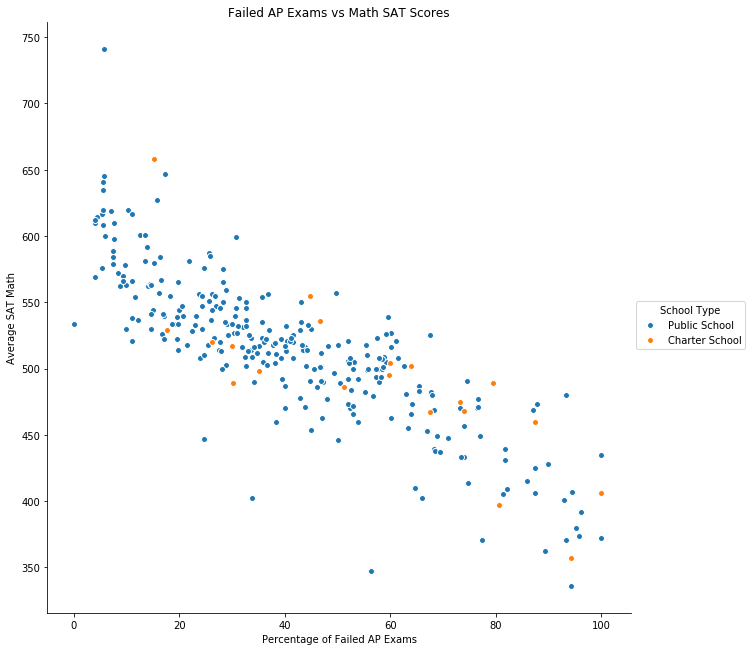

In [4]:
sns.pairplot(x_vars=['% AP_Score 1-2'], y_vars=['Average SAT_Math'], data=MASchools, hue='School Type', size=9)
plt.xlabel('Percentage of Failed AP Exams')
plt.ylabel('Average SAT Math')
plt.title('Failed AP Exams vs Math SAT Scores')
plt.show()

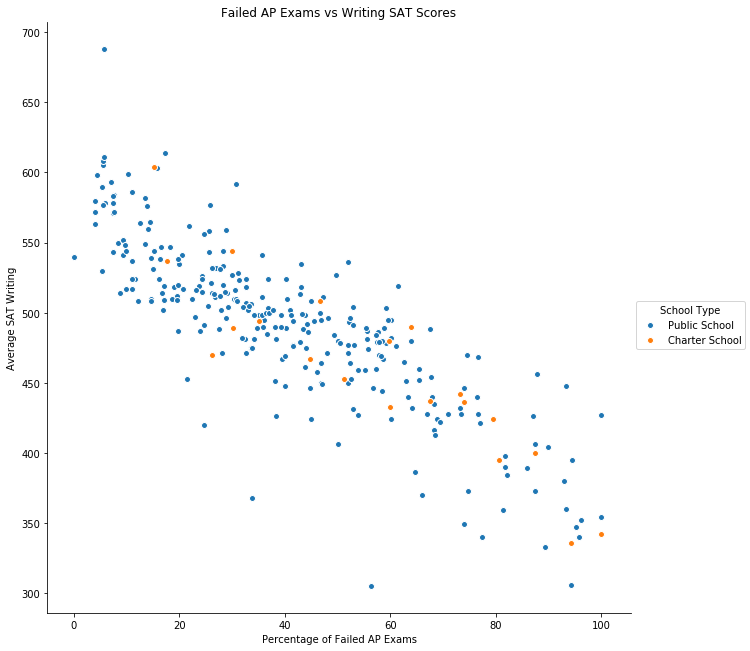

In [5]:
sns.pairplot(x_vars=['% AP_Score 1-2'], y_vars=['Average SAT_Writing'], data=MASchools, hue='School Type', size=9)
plt.xlabel('Percentage of Failed AP Exams')
plt.ylabel('Average SAT Writing')
plt.title('Failed AP Exams vs Writing SAT Scores')
plt.show()

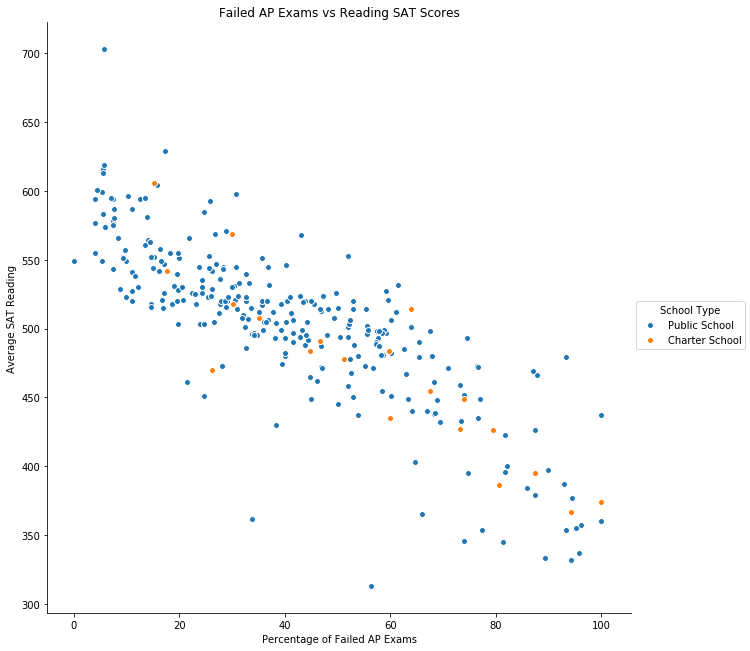

In [6]:
sns.pairplot(x_vars=['% AP_Score 1-2'], y_vars=['Average SAT_Reading'], data=MASchools, hue='School Type', size=9)
plt.xlabel('Percentage of Failed AP Exams')
plt.ylabel('Average SAT Reading')
plt.title('Failed AP Exams vs Reading SAT Scores')
plt.show()

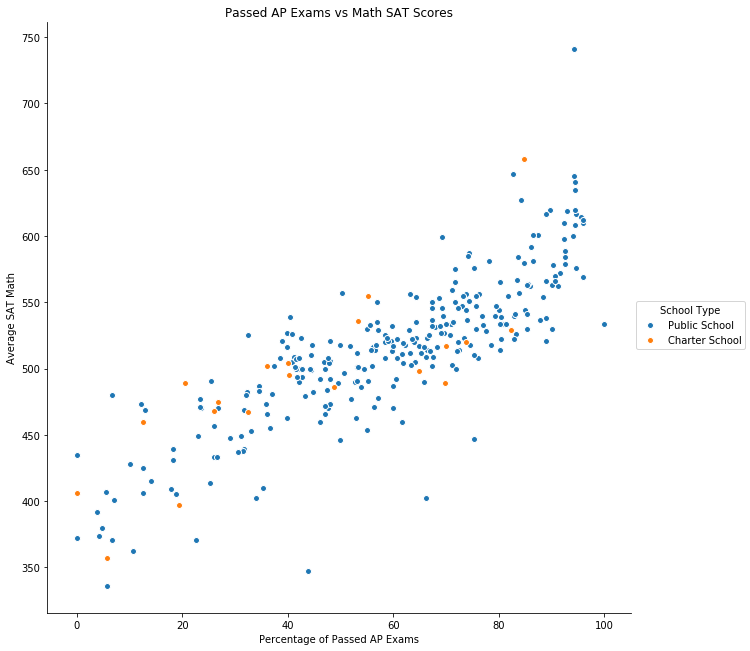

In [7]:
sns.pairplot(x_vars=['% AP_Score 3-5'], y_vars=['Average SAT_Math'], data=MASchools, hue='School Type', size=9)
plt.xlabel('Percentage of Passed AP Exams')
plt.ylabel('Average SAT Math')
plt.title('Passed AP Exams vs Math SAT Scores')
plt.show()

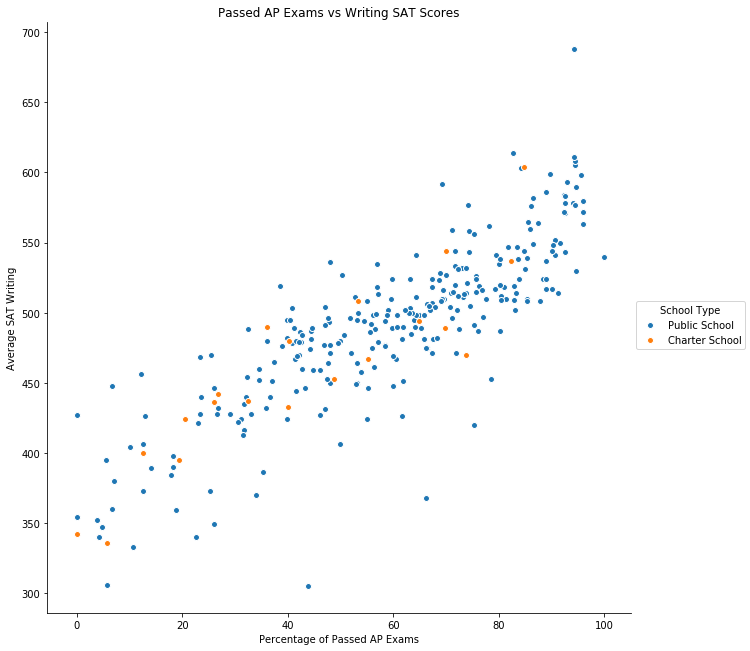

In [8]:
sns.pairplot(x_vars=['% AP_Score 3-5'], y_vars=['Average SAT_Writing'], data=MASchools, hue='School Type', size=9)
plt.xlabel('Percentage of Passed AP Exams')
plt.ylabel('Average SAT Writing')
plt.title('Passed AP Exams vs Writing SAT Scores')
plt.show()

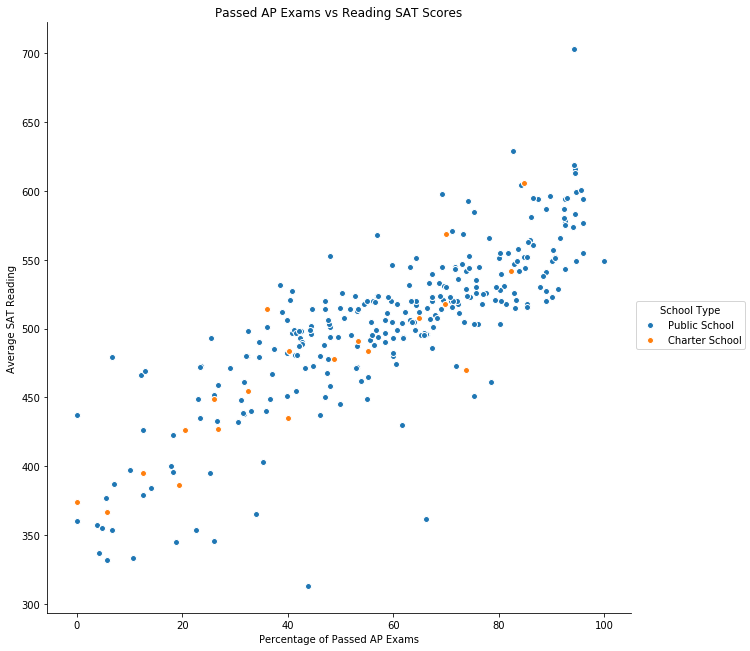

In [9]:
sns.pairplot(x_vars=['% AP_Score 3-5'], y_vars=['Average SAT_Reading'], data=MASchools, hue='School Type', size=9)
plt.xlabel('Percentage of Passed AP Exams')
plt.ylabel('Average SAT Reading')
plt.title('Passed AP Exams vs Reading SAT Scores')
plt.show()

## Preliminary Analysis Focus: Effect of Ethnic Minority Population Percentage on SAT Math Scores.

We begin by looking into a commonly heard claim: Students of minority groups recieve less of an education in the current education system. The largest minority group in Massachussets consists of Hispanic Americans. This is also true for the United States. We begin our preliminary analysis
by studying to see if there is a relationship between ethnic population percentages within a school and the corresponding average SAT math scores. In general, the higher the test score, the better.

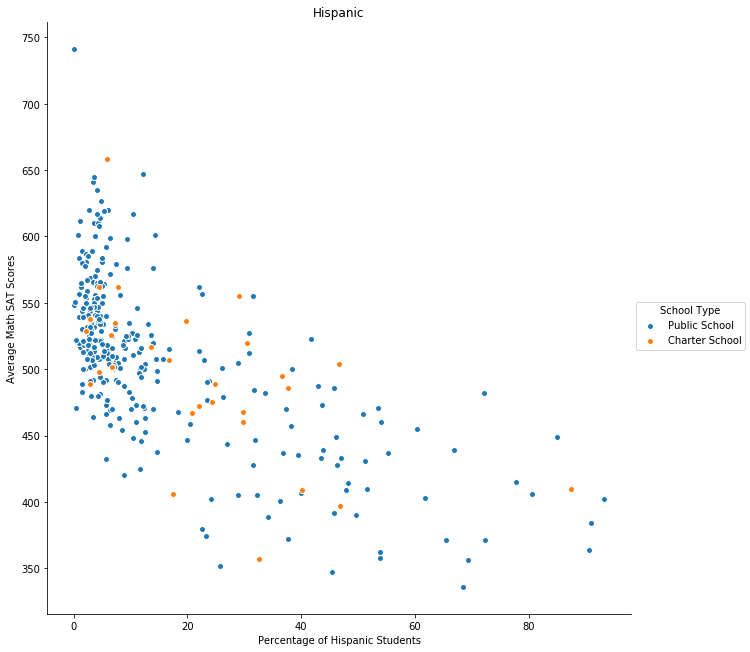

In [10]:
sns.pairplot(x_vars=['% Hispanic'], y_vars=['Average SAT_Math'], data=MASchools, hue='School Type', size=9)
plt.xlabel('Percentage of Hispanic Students')
plt.ylabel('Average Math SAT Scores')
plt.title('Hispanic')
plt.show()

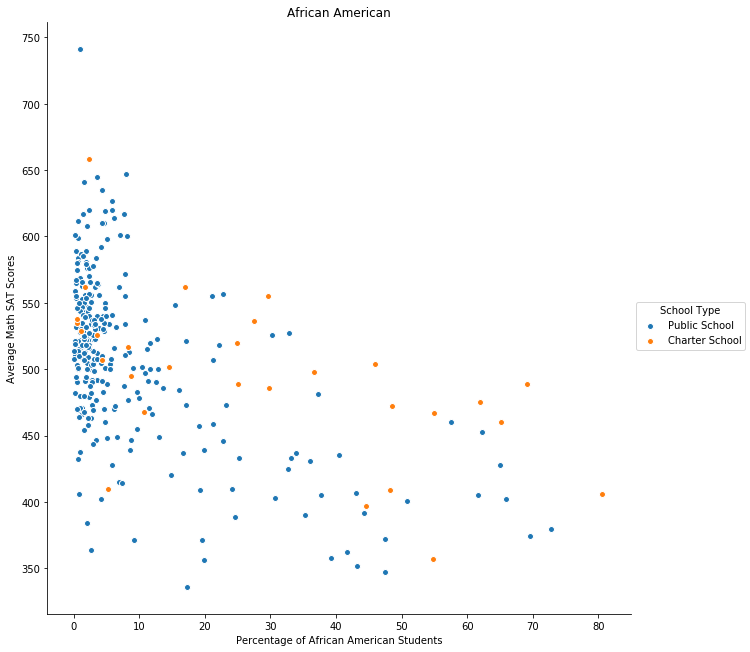

In [11]:
sns.pairplot(x_vars=['% African American'], y_vars=['Average SAT_Math'], data=MASchools, hue='School Type', size=9)
plt.xlabel('Percentage of African American Students')
plt.ylabel('Average Math SAT Scores')
plt.title('African American')
plt.show()

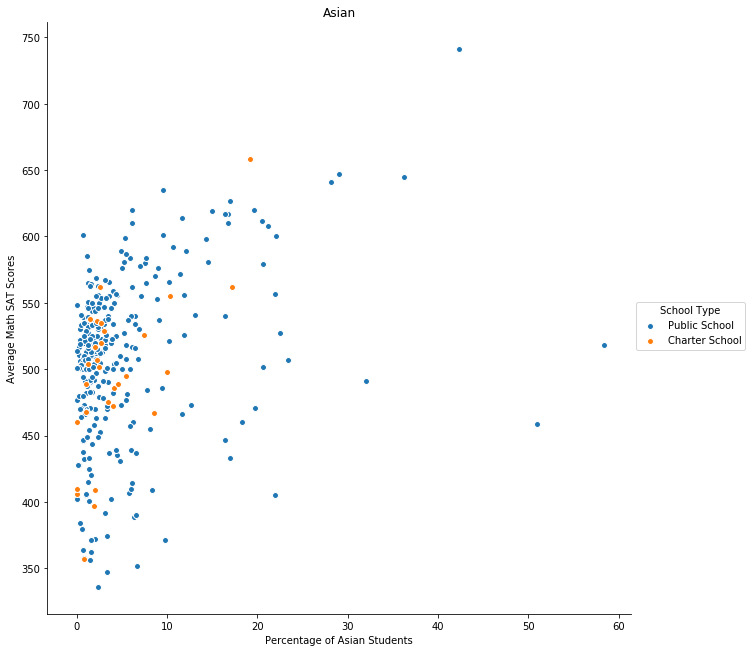

In [12]:
sns.pairplot(x_vars=['% Asian'], y_vars=['Average SAT_Math'], data=MASchools, hue='School Type', size=9)
plt.xlabel('Percentage of Asian Students')
plt.ylabel('Average Math SAT Scores')
plt.title('Asian')
plt.show()

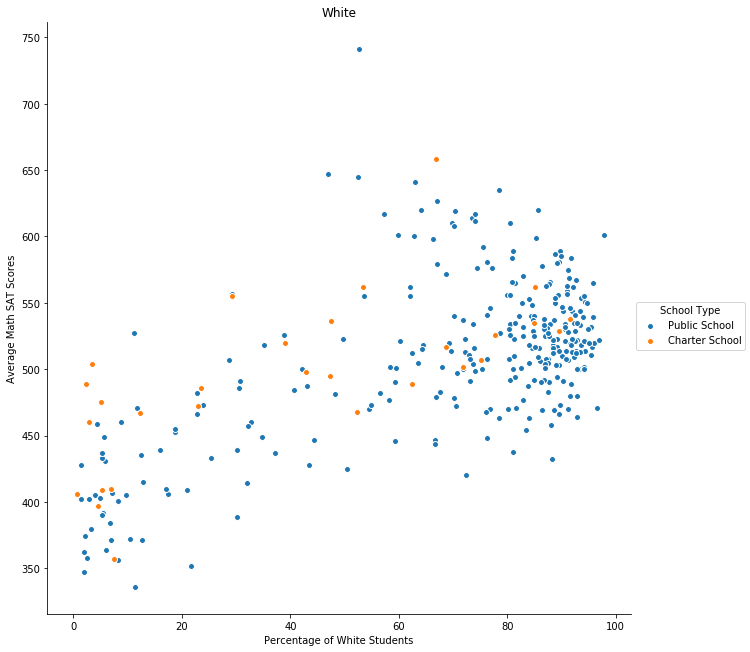

In [13]:
sns.pairplot(x_vars=['% White'], y_vars=['Average SAT_Math'], data=MASchools, hue='School Type', size=9)
plt.xlabel('Percentage of White Students')
plt.ylabel('Average Math SAT Scores')
plt.title('White')
plt.show()

## Is there a confounding factor here?

We commonly hear this claim that students of a particular ethnic background are receiving less of an education, which could be the case in the above plots as schools with higher percentages of ethnic students performed poorer on average on the SAT. But is that is really what's going on here? This correlation is not evidence enough to suggest that school systems are being intentionally discrimative towards their students. So what could we be observing here? 

One of the first things that comes to mind is that lower income areas are frequently thought to have a demographic makeup that is not proportional to the area as a whole. This is true for Massachusets. Of those who are below the poverty line, 38% identify as hispanic with only 8% identifying as white, (6). This is vastly different compared to the population of the state as a whole. 

**(The following is not particularly clear, might need some work)** So we set out to see next is this data also supporting that a school with a higher hispanic population tends to see a higher economically disadvantaged population? The plots below indicate a strong correlation here. 

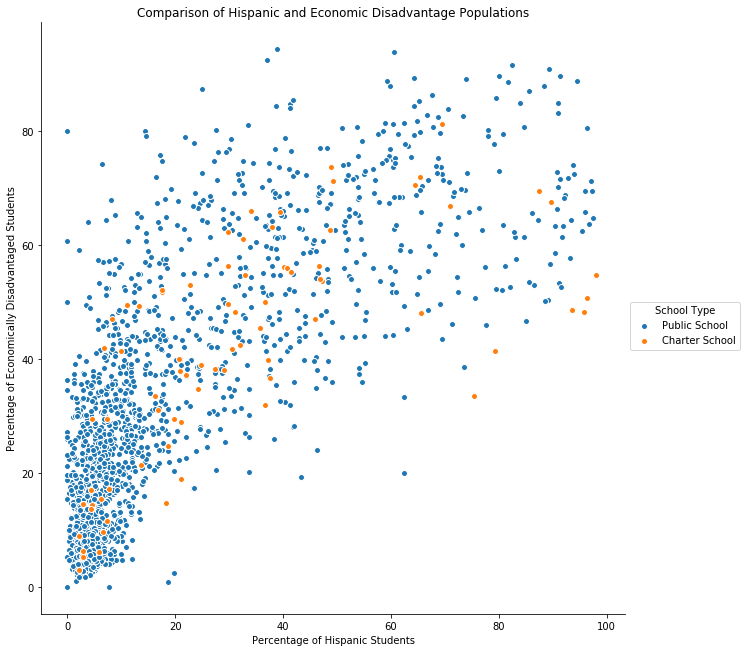

In [14]:
sns.pairplot(x_vars=['% Hispanic'], y_vars=['% Economically Disadvantaged'], data=MASchools, hue='School Type', size=9)
plt.xlabel('Percentage of Hispanic Students')
plt.ylabel('Percentage of Economically Disadvantaged Students')
plt.title('Comparison of Hispanic and Economic Disadvantage Populations')
plt.show()

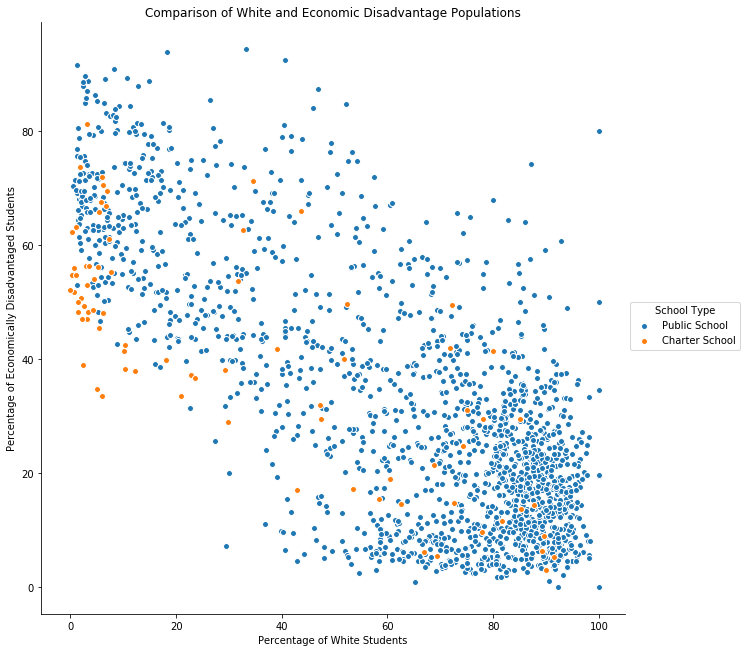

In [15]:
sns.pairplot(x_vars=['% White'], y_vars=['% Economically Disadvantaged'], data=MASchools, hue='School Type', size=9)
plt.xlabel('Percentage of White Students')
plt.ylabel('Percentage of Economically Disadvantaged Students')
plt.title('Comparison of White and Economic Disadvantage Populations')
plt.show()

## Preliminary Analysis Focus: Economically Disadvantaged Student Success

So we decide to focus instead on what kind of relationship there is between a school's proportion of economically disadvantaged students and their rates of student success. This section has numerous sub sections. It is important for completeness to investigate numerous variables. Each heading will be followed with a description. Readers interested in the final analysis and variables we found to be most important in explaining the variation in student success should proceed to the heading labeled as 'Analysis: Economic Disadvantage's Effect on Student Success'. After each subheading we will also summarize why we looked into these variables and if we found any significant trends we felt warranted further investigation. 

### SATs and Economic Disadvantage

Here we found a very strong correlation. SAT scores all showed a negative linear relationship with the percentage of students at a given school that classify as economically disadvantaged. The number of SAT Scores taken has a lightly downward trend but the relationship is less defined than the relationship with the scores themselves. 

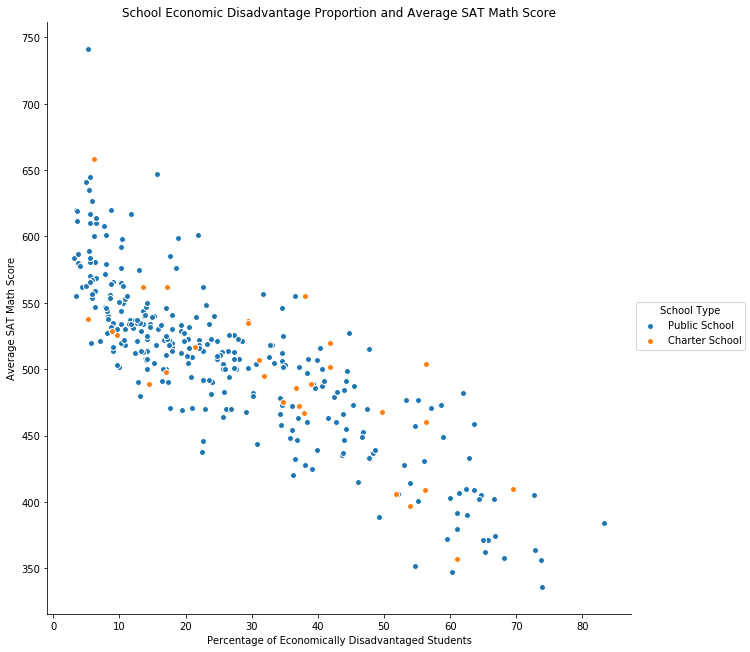

In [16]:
sns.pairplot(x_vars=['% Economically Disadvantaged'], y_vars=['Average SAT_Math'], data=MASchools, hue='School Type', size=9)
plt.xlabel('Percentage of Economically Disadvantaged Students')
plt.ylabel('Average SAT Math Score')
plt.title('School Economic Disadvantage Proportion and Average SAT Math Score')
plt.show()

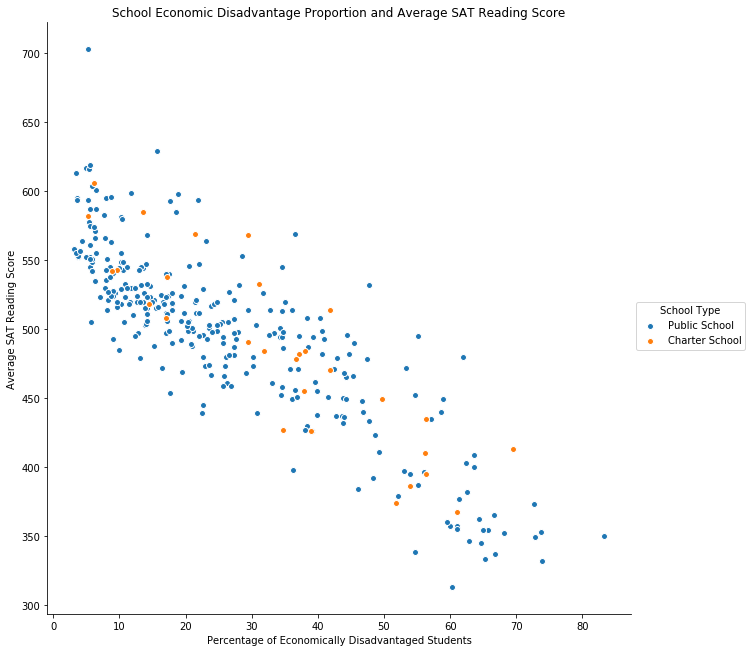

In [17]:
sns.pairplot(x_vars=['% Economically Disadvantaged'], y_vars=['Average SAT_Reading'], data=MASchools, hue='School Type', size=9)
plt.xlabel('Percentage of Economically Disadvantaged Students')
plt.ylabel('Average SAT Reading Score')
plt.title('School Economic Disadvantage Proportion and Average SAT Reading Score')
plt.show()

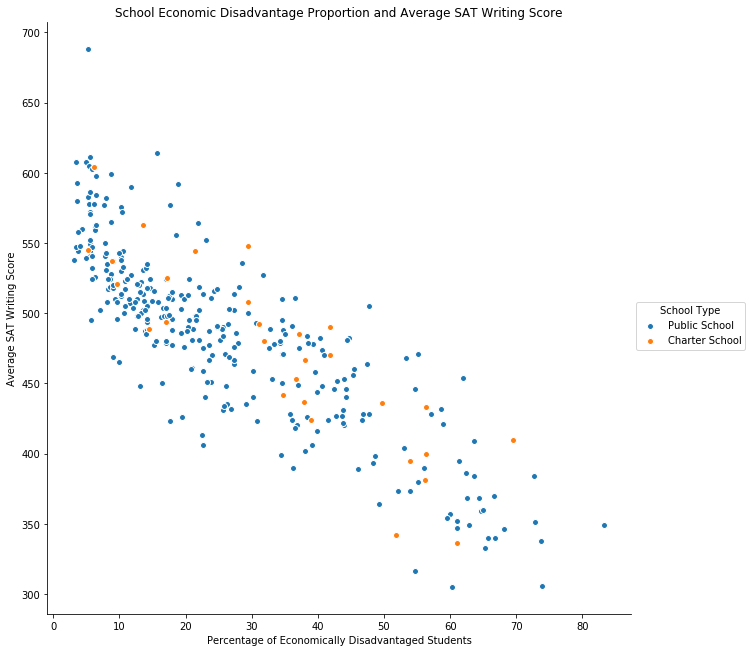

In [18]:
sns.pairplot(x_vars=['% Economically Disadvantaged'], y_vars=['Average SAT_Writing'], data=MASchools, hue='School Type', size=9)
plt.xlabel('Percentage of Economically Disadvantaged Students')
plt.ylabel('Average SAT Writing Score')
plt.title('School Economic Disadvantage Proportion and Average SAT Writing Score')
plt.show()

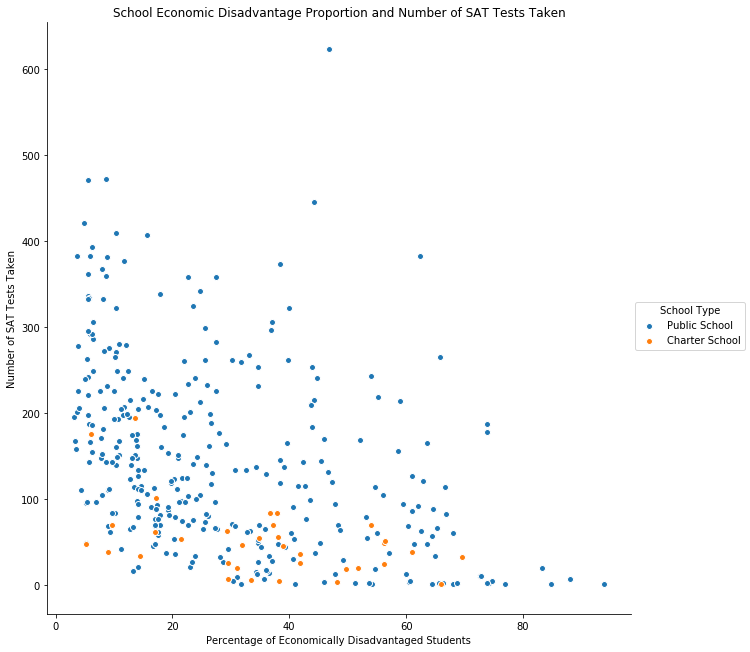

In [19]:
sns.pairplot(x_vars=['% Economically Disadvantaged'], y_vars=['SAT_Tests Taken'], data=MASchools, hue='School Type', size=9)
plt.xlabel('Percentage of Economically Disadvantaged Students')
plt.ylabel('Number of SAT Tests Taken')
plt.title('School Economic Disadvantage Proportion and Number of SAT Tests Taken')
plt.show()

### AP Exams and Economic Disadvantage

We find the same trend here as we did with preformance on the SATs. This makes sense given the strong correlation between these two variables that we observed earlier.

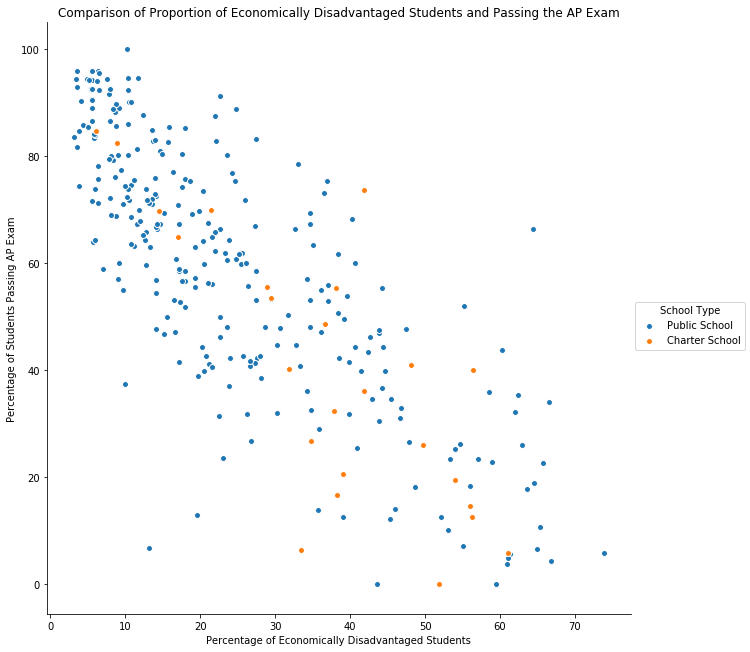

In [20]:
sns.pairplot(x_vars=['% Economically Disadvantaged'], y_vars=['% AP_Score 3-5'], data=MASchools, hue='School Type', size=9)
plt.xlabel('Percentage of Economically Disadvantaged Students')
plt.ylabel('Percentage of Students Passing AP Exam')
plt.title('Comparison of Proportion of Economically Disadvantaged Students and Passing the AP Exam')
plt.show()

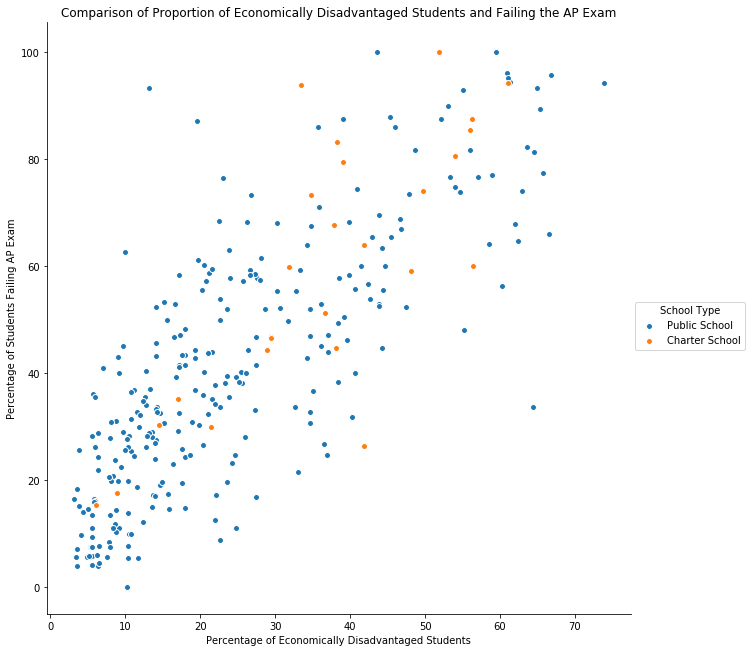

In [21]:
sns.pairplot(x_vars=['% Economically Disadvantaged'], y_vars=['% AP_Score 1-2'], data=MASchools, hue='School Type', size=9)
plt.xlabel('Percentage of Economically Disadvantaged Students')
plt.ylabel('Percentage of Students Failing AP Exam')
plt.title('Comparison of Proportion of Economically Disadvantaged Students and Failing the AP Exam')
plt.show()

### College Attendance and Economic Disadvantage

We are unsurprised by this trend. There are so many factors that contribute to a student's ability to attend college. We are surprised to see such high percentages across the board of students attending college. What was surprising was that community college attendance has a positive linear relationship with economic disadvantage. This indicates to us that in Massachusetts there is a high value placed on college attendance regardless of income level. 

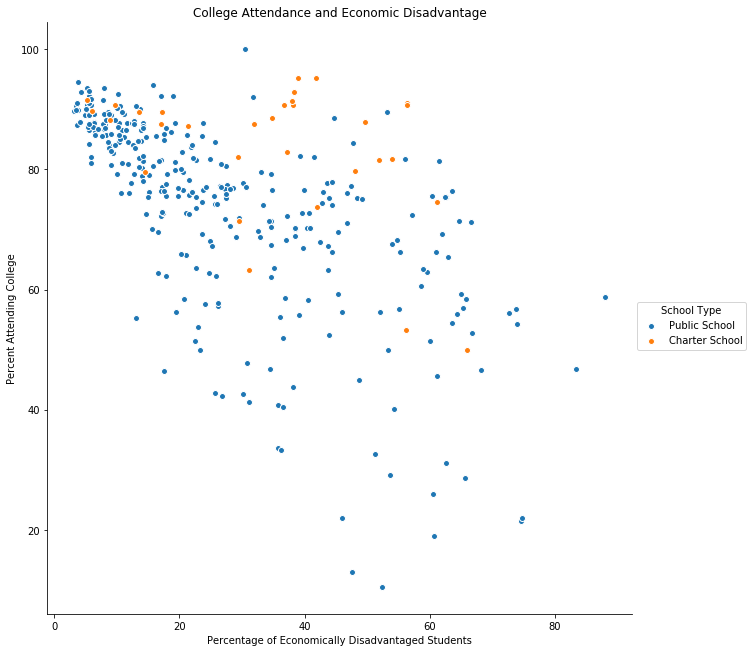

In [22]:
sns.pairplot(x_vars=['% Economically Disadvantaged'], y_vars=['% Attending College'], data=MASchools, hue='School Type', size=9)
plt.xlabel('Percentage of Economically Disadvantaged Students')
plt.ylabel('Percent Attending College')
plt.title('College Attendance and Economic Disadvantage')
plt.show()

There is an extensive analysis that focuses on the relationship between these two variables. It is quite well done and can be found at: https://www.kaggle.com/ndalziel/who-goes-to-college

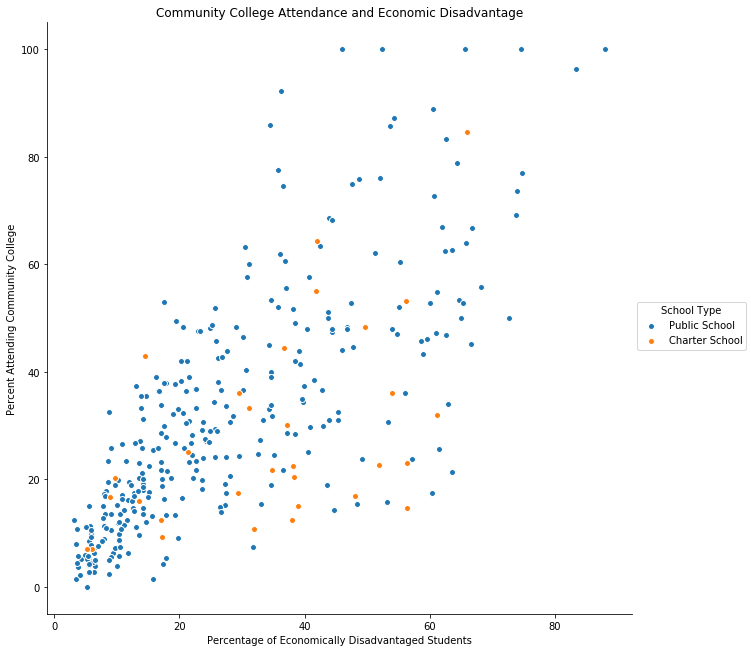

In [23]:
sns.pairplot(x_vars=['% Economically Disadvantaged'], y_vars=['% MA Community College'], data=MASchools, hue='School Type', size=9)
plt.xlabel('Percentage of Economically Disadvantaged Students')
plt.ylabel('Percent Attending Community College')
plt.title('Community College Attendance and Economic Disadvantage')
plt.show()

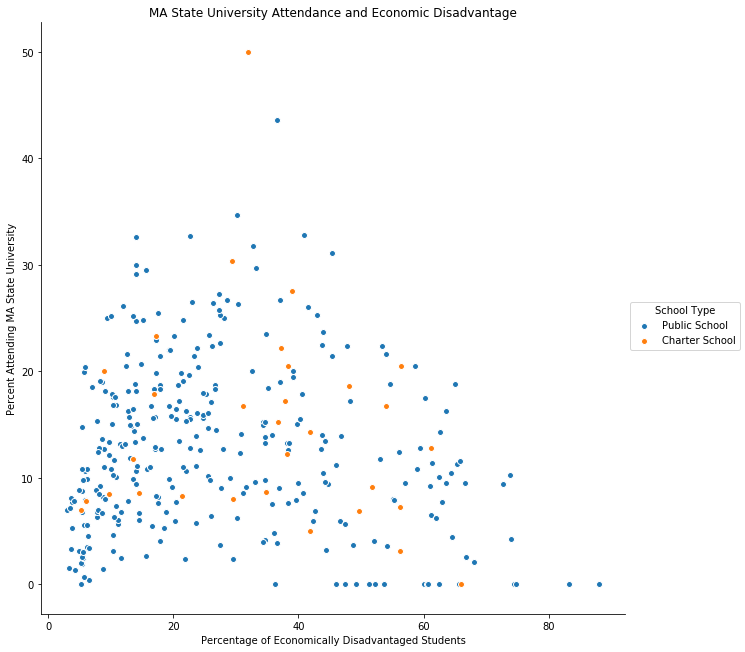

In [24]:
sns.pairplot(x_vars=['% Economically Disadvantaged'], y_vars=['% MA State University'], data=MASchools, hue='School Type', size=9)
plt.xlabel('Percentage of Economically Disadvantaged Students')
plt.ylabel('Percent Attending MA State University')
plt.title('MA State University Attendance and Economic Disadvantage')
plt.show()

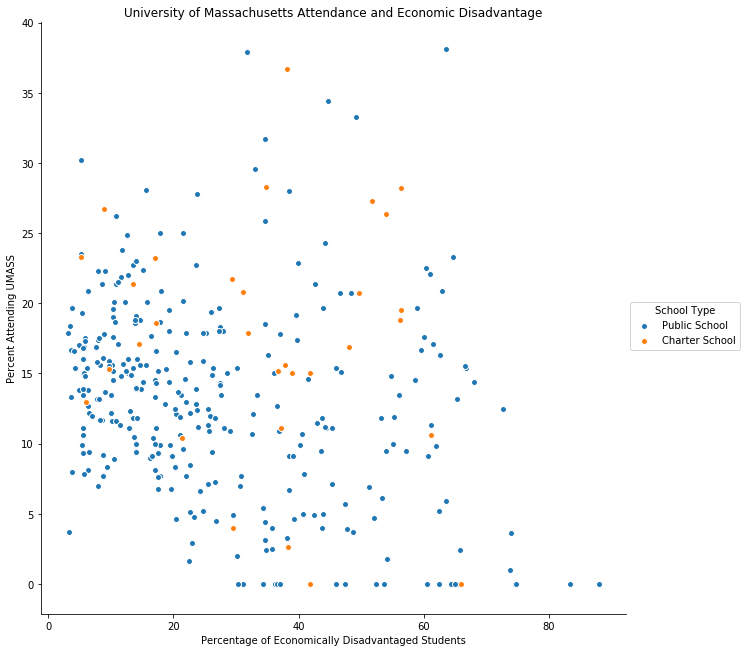

In [25]:
sns.pairplot(x_vars=['% Economically Disadvantaged'], y_vars=['% UMass'], data=MASchools, hue='School Type', size=9)
plt.xlabel('Percentage of Economically Disadvantaged Students')
plt.ylabel('Percent Attending UMASS')
plt.title('University of Massachusetts Attendance and Economic Disadvantage')
plt.show()

### MCAS (Massachusetts Standardized Testing) and Economic Disadvantage

The MCAS is Massachusetts' standardized testing. These are given to all students in attendance of the school. We wanted to see if the relationship between the percent of students scoring at least a passing grade on the MCAS and the percent of economically disadvantaged students changed by grade. We did this for English and Math. Across all of the test the relationship is approximately the same, a negative approximately linear relationship. This is a lengthy section and while it is neccesary to look at it the plots do not provide much additional information and if the reader is not interested in verifying this they may want to just skip to the next subsection.  

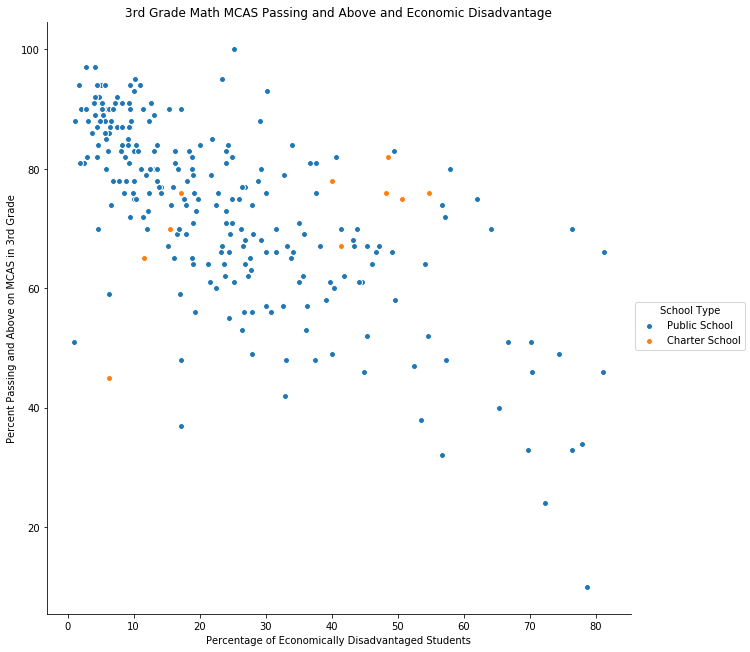

In [26]:
sns.pairplot(x_vars=['% Economically Disadvantaged'], y_vars=['% MCAS_3rdGrade_Math_P+A'], data=MASchools, hue='School Type', size=9)
plt.xlabel('Percentage of Economically Disadvantaged Students')
plt.ylabel('Percent Passing and Above on MCAS in 3rd Grade')
plt.title('3rd Grade Math MCAS Passing and Above and Economic Disadvantage')
plt.show()

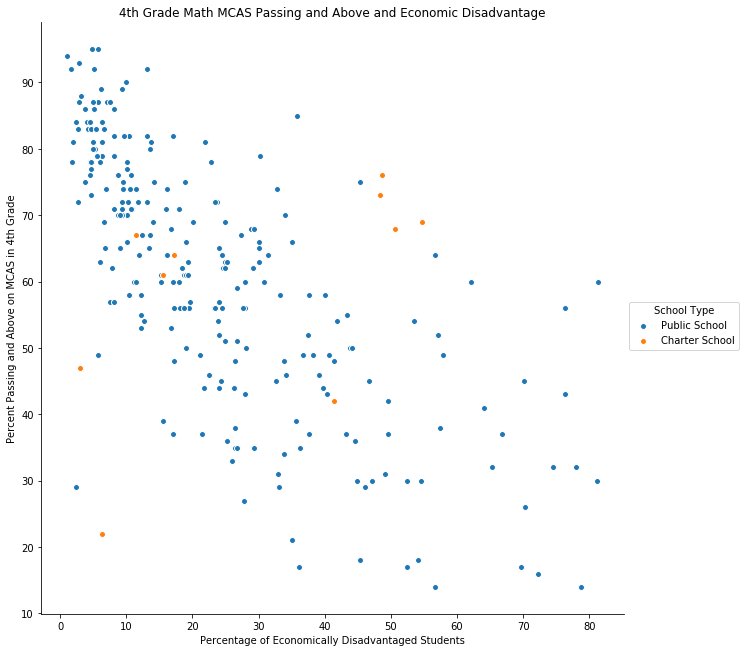

In [27]:
sns.pairplot(x_vars=['% Economically Disadvantaged'], y_vars=['% MCAS_4thGrade_Math_P+A'], data=MASchools, hue='School Type', size=9)
plt.xlabel('Percentage of Economically Disadvantaged Students')
plt.ylabel('Percent Passing and Above on MCAS in 4th Grade')
plt.title('4th Grade Math MCAS Passing and Above and Economic Disadvantage')
plt.show()

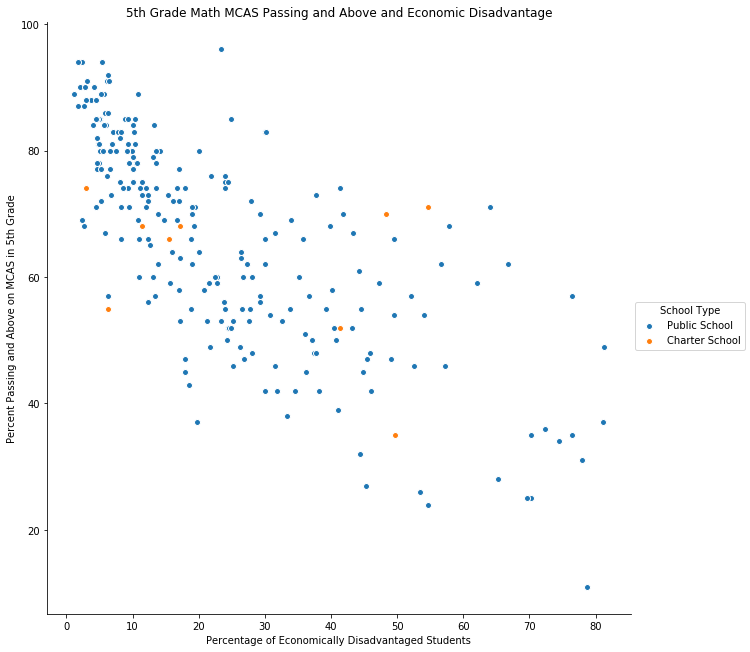

In [28]:
sns.pairplot(x_vars=['% Economically Disadvantaged'], y_vars=['% MCAS_5thGrade_Math_P+A'], data=MASchools, hue='School Type', size=9)
plt.xlabel('Percentage of Economically Disadvantaged Students')
plt.ylabel('Percent Passing and Above on MCAS in 5th Grade')
plt.title('5th Grade Math MCAS Passing and Above and Economic Disadvantage')
plt.show()

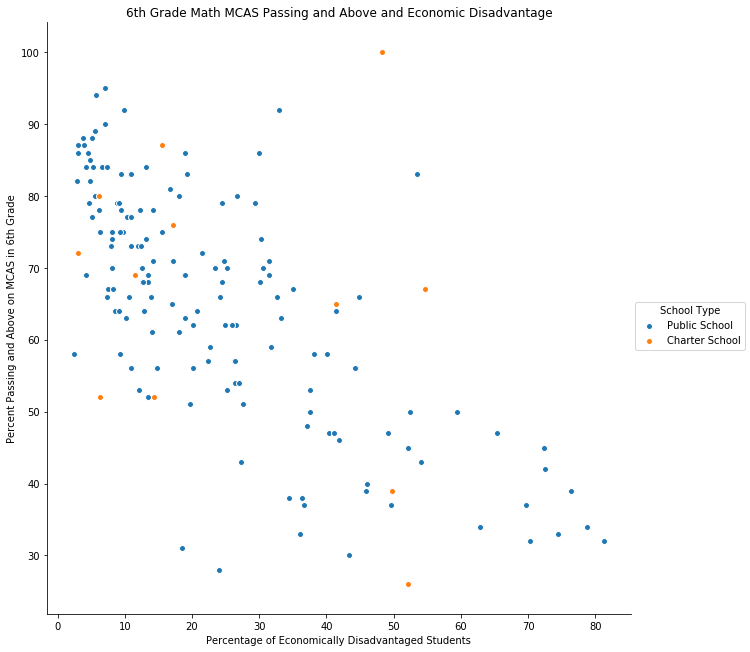

In [29]:
sns.pairplot(x_vars=['% Economically Disadvantaged'], y_vars=['% MCAS_6thGrade_Math_P+A'], data=MASchools, hue='School Type', size=9)
plt.xlabel('Percentage of Economically Disadvantaged Students')
plt.ylabel('Percent Passing and Above on MCAS in 6th Grade')
plt.title('6th Grade Math MCAS Passing and Above and Economic Disadvantage')
plt.show()

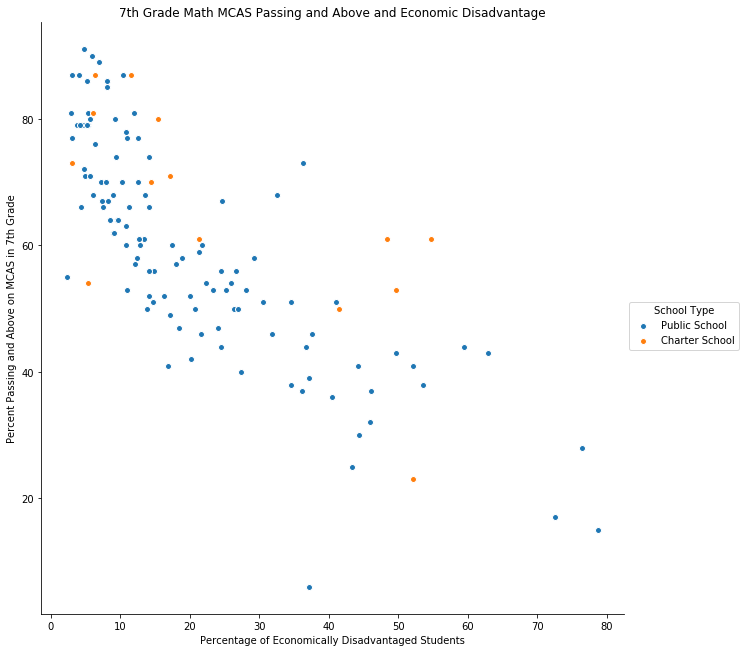

In [30]:
sns.pairplot(x_vars=['% Economically Disadvantaged'], y_vars=['% MCAS_7thGrade_Math_P+A'], data=MASchools, hue='School Type', size=9)
plt.xlabel('Percentage of Economically Disadvantaged Students')
plt.ylabel('Percent Passing and Above on MCAS in 7th Grade')
plt.title('7th Grade Math MCAS Passing and Above and Economic Disadvantage')
plt.show()

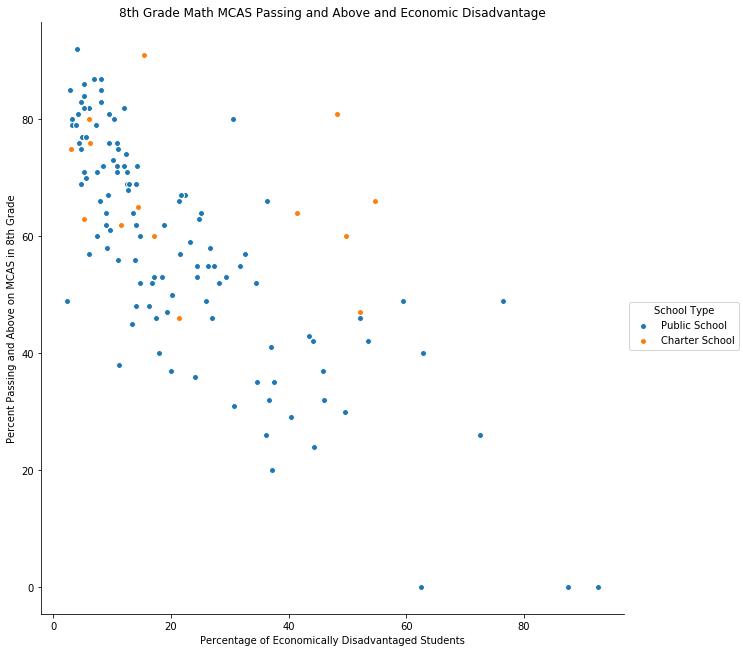

In [31]:
sns.pairplot(x_vars=['% Economically Disadvantaged'], y_vars=['% MCAS_8thGrade_Math_P+A'], data=MASchools, hue='School Type', size=9)
plt.xlabel('Percentage of Economically Disadvantaged Students')
plt.ylabel('Percent Passing and Above on MCAS in 8th Grade')
plt.title('8th Grade Math MCAS Passing and Above and Economic Disadvantage')
plt.show()

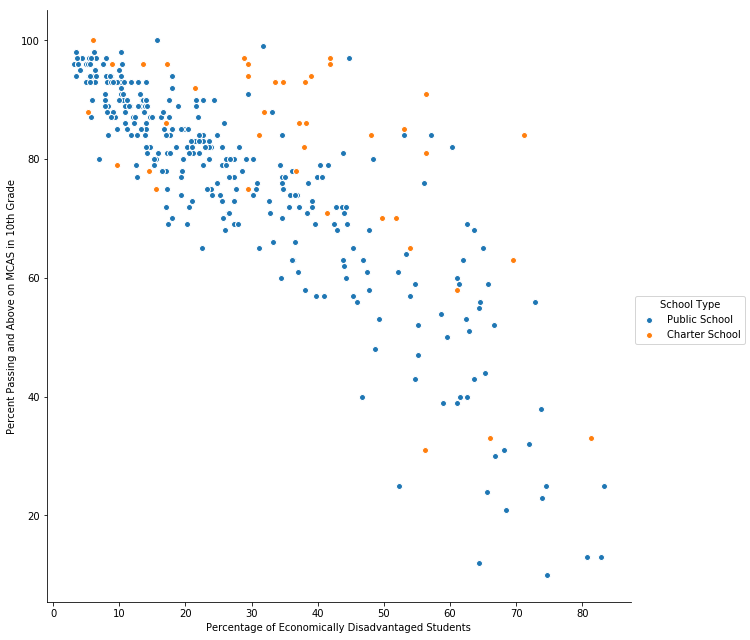

In [32]:
sns.pairplot(x_vars=['% Economically Disadvantaged'], y_vars=['% MCAS_10thGrade_Math_P+A'], data=MASchools, hue='School Type', size=9)
plt.xlabel('Percentage of Economically Disadvantaged Students')
plt.ylabel('Percent Passing and Above on MCAS in 10th Grade')
plt.show()


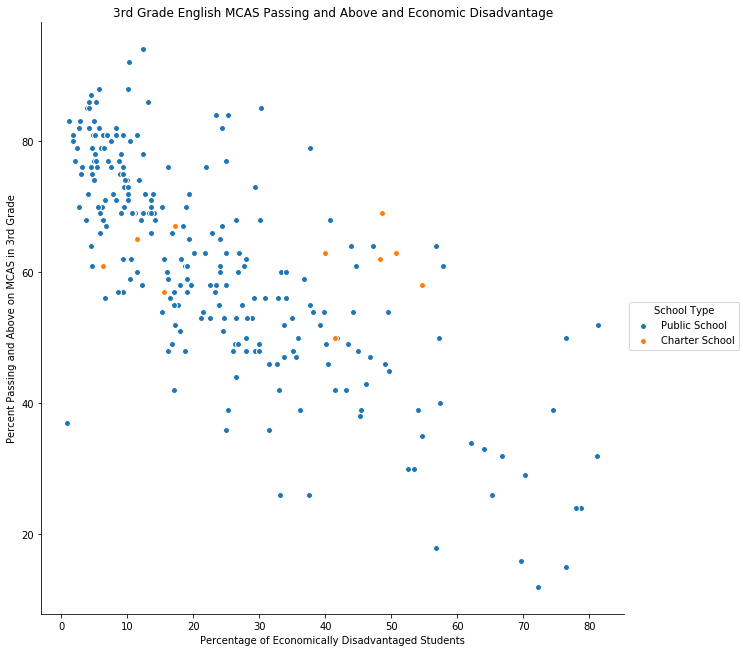

In [33]:
sns.pairplot(x_vars=['% Economically Disadvantaged'], y_vars=['% MCAS_3rdGrade_English_P+A'], data=MASchools, hue='School Type', size=9)
plt.xlabel('Percentage of Economically Disadvantaged Students')
plt.ylabel('Percent Passing and Above on MCAS in 3rd Grade')
plt.title('3rd Grade English MCAS Passing and Above and Economic Disadvantage')
plt.show()

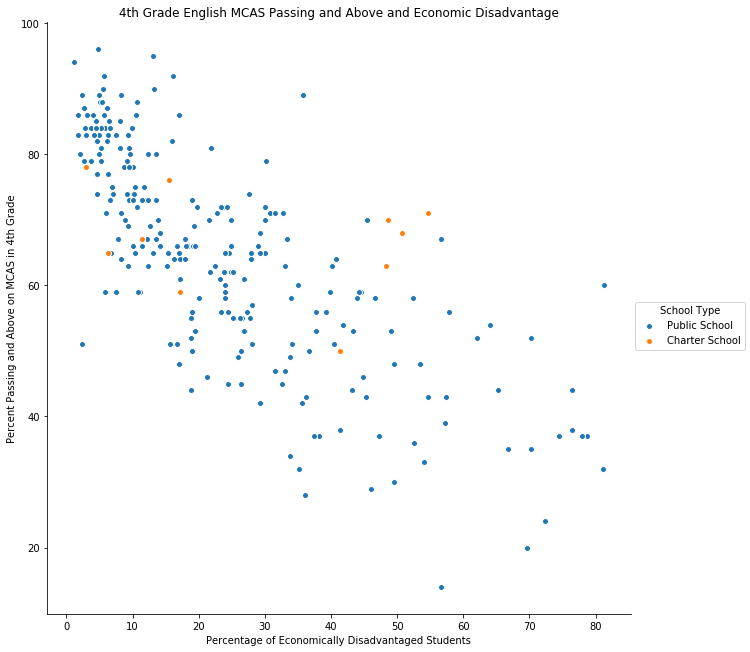

In [34]:
sns.pairplot(x_vars=['% Economically Disadvantaged'], y_vars=['% MCAS_4thGrade_English_P+A'], data=MASchools, hue='School Type', size=9)
plt.xlabel('Percentage of Economically Disadvantaged Students')
plt.ylabel('Percent Passing and Above on MCAS in 4th Grade')
plt.title('4th Grade English MCAS Passing and Above and Economic Disadvantage')
plt.show()

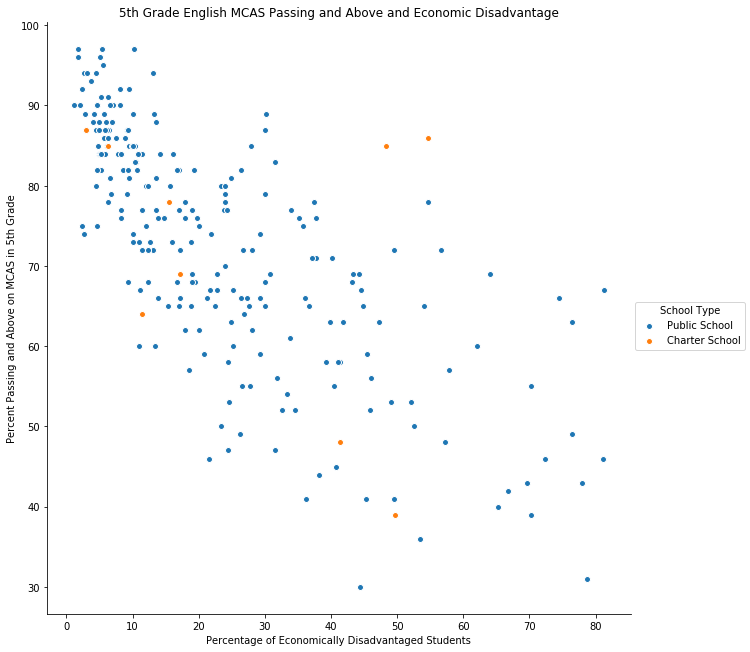

In [35]:
sns.pairplot(x_vars=['% Economically Disadvantaged'], y_vars=['% MCAS_5thGrade_English_P+A'], data=MASchools, hue='School Type', size=9)
plt.xlabel('Percentage of Economically Disadvantaged Students')
plt.ylabel('Percent Passing and Above on MCAS in 5th Grade')
plt.title('5th Grade English MCAS Passing and Above and Economic Disadvantage')
plt.show()

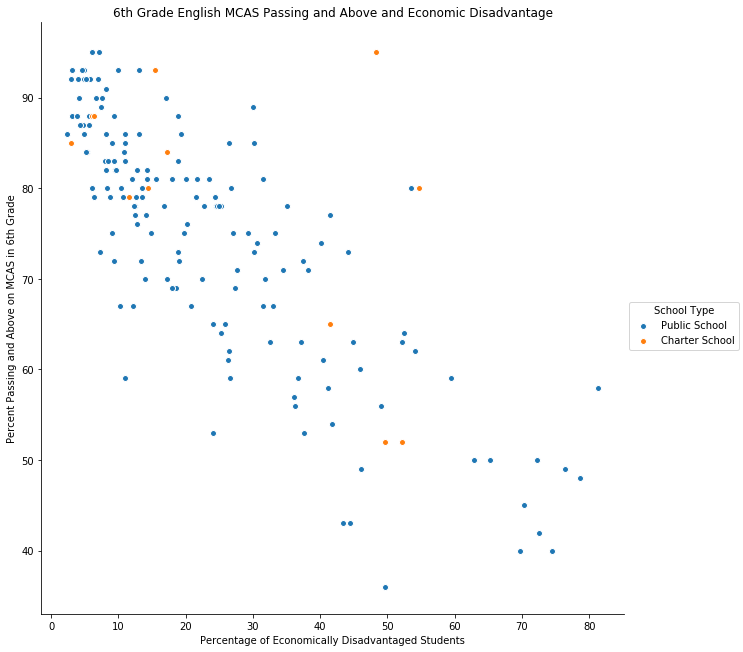

In [36]:
sns.pairplot(x_vars=['% Economically Disadvantaged'], y_vars=['% MCAS_6thGrade_English_P+A'], data=MASchools, hue='School Type', size=9)
plt.xlabel('Percentage of Economically Disadvantaged Students')
plt.ylabel('Percent Passing and Above on MCAS in 6th Grade')
plt.title('6th Grade English MCAS Passing and Above and Economic Disadvantage')
plt.show()

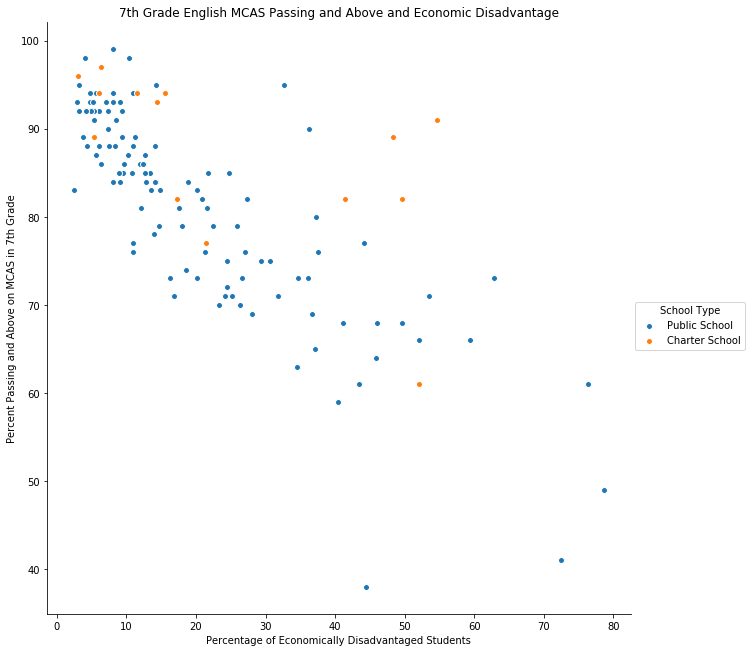

In [37]:
sns.pairplot(x_vars=['% Economically Disadvantaged'], y_vars=['% MCAS_7thGrade_English_P+A'], data=MASchools, hue='School Type', size=9)
plt.xlabel('Percentage of Economically Disadvantaged Students')
plt.ylabel('Percent Passing and Above on MCAS in 7th Grade')
plt.title('7th Grade English MCAS Passing and Above and Economic Disadvantage')
plt.show()

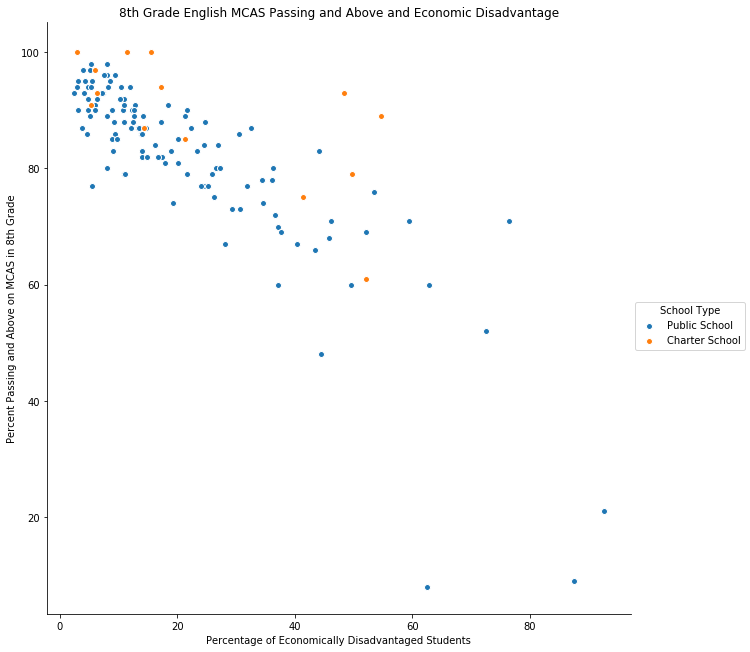

In [38]:
sns.pairplot(x_vars=['% Economically Disadvantaged'], y_vars=['% MCAS_8thGrade_English_P+A'], data=MASchools, hue='School Type', size=9)
plt.xlabel('Percentage of Economically Disadvantaged Students')
plt.ylabel('Percent Passing and Above on MCAS in 8th Grade')
plt.title('8th Grade English MCAS Passing and Above and Economic Disadvantage')
plt.show()

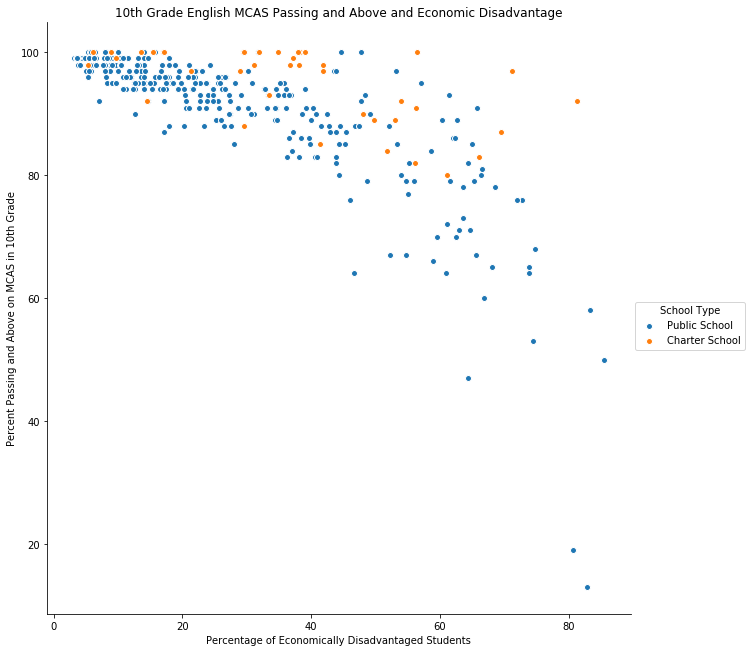

In [39]:
sns.pairplot(x_vars=['% Economically Disadvantaged'], y_vars=['% MCAS_10thGrade_English_P+A'], data=MASchools, hue='School Type', size=9)
plt.xlabel('Percentage of Economically Disadvantaged Students')
plt.ylabel('Percent Passing and Above on MCAS in 10th Grade')
plt.title('10th Grade English MCAS Passing and Above and Economic Disadvantage')
plt.show()

### School Quality Measues and Economic Disadvantage

For the relatinship between the drop out percentage of percentage of economically disadvantaged students we see an exponential trend where starting at around 40% economically disadvantage the percent dropping out starts to explode. No school has a drop out rate higher than 75%. We were surprised at the percentage of drop outs at some of these schools. Total enrollment, average class size and average expenditures appear fairly uniform. 

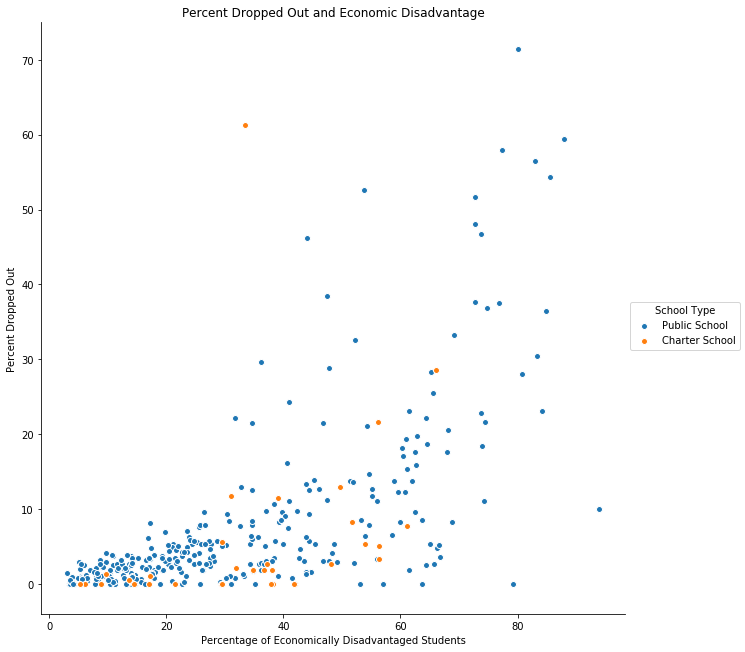

In [40]:
sns.pairplot(x_vars=['% Economically Disadvantaged'], y_vars=['% Dropped Out'], data=MASchools, hue='School Type', size=9)
plt.xlabel('Percentage of Economically Disadvantaged Students')
plt.ylabel('Percent Dropped Out')
plt.title('Percent Dropped Out and Economic Disadvantage')
plt.show()

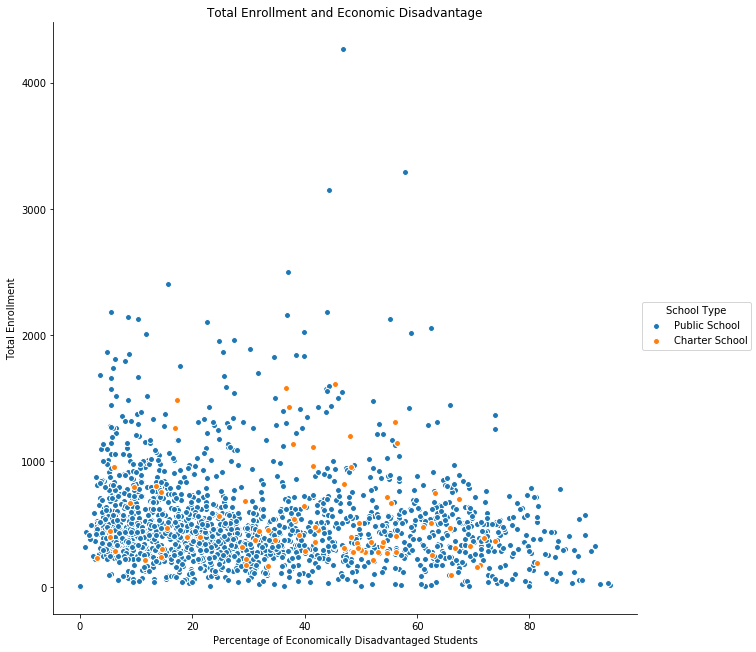

In [41]:
sns.pairplot(x_vars=['% Economically Disadvantaged'], y_vars=['TOTAL_Enrollment'], data=MASchools, hue='School Type', size=9)
plt.xlabel('Percentage of Economically Disadvantaged Students')
plt.ylabel('Total Enrollment')
plt.title('Total Enrollment and Economic Disadvantage')
plt.show()

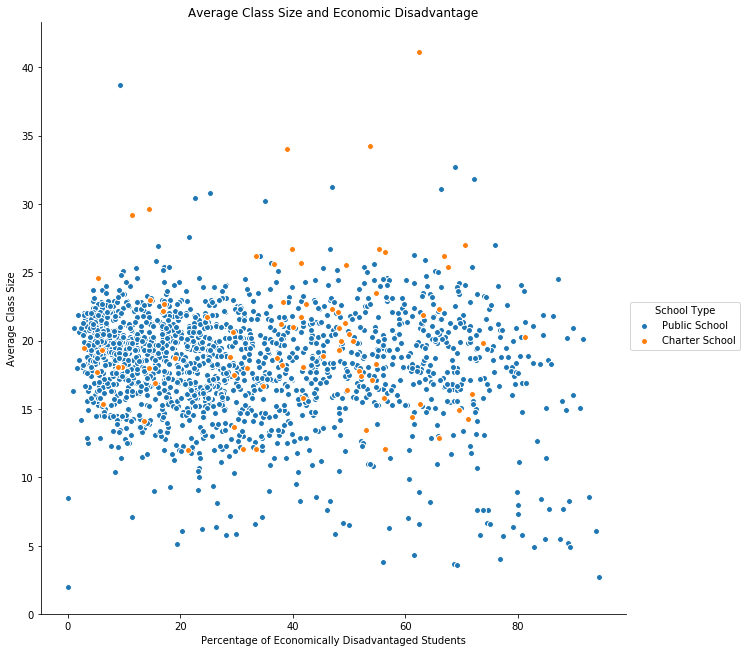

In [42]:
sns.pairplot(x_vars=['% Economically Disadvantaged'], y_vars=['Average Class Size'], data=MASchools, hue='School Type', size=9)
plt.xlabel('Percentage of Economically Disadvantaged Students')
plt.ylabel('Average Class Size')
plt.title('Average Class Size and Economic Disadvantage')
plt.show()

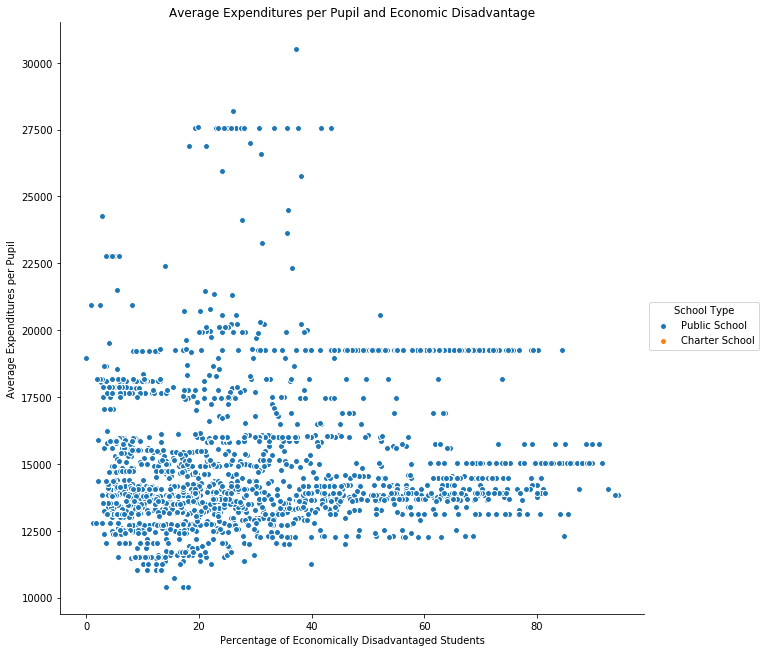

In [43]:
sns.pairplot(x_vars=['% Economically Disadvantaged'], y_vars=['Average Expenditures per Pupil'], data=MASchools, hue='School Type', size=9)
plt.xlabel('Percentage of Economically Disadvantaged Students')
plt.ylabel('Average Expenditures per Pupil')
plt.title('Average Expenditures per Pupil and Economic Disadvantage')
plt.show()

## Analysis: Investigating Economic Disadvantage's effect on Student Success

There is clearly a realtionship between students who are econimically disadvantaged and their success. We now more deeply investigate this relationship.

## Are we able to assume SAT Math, Reading and Writing scores are interchangable?

Yes we are. We see that they are almost perfectly linear y = x model.  

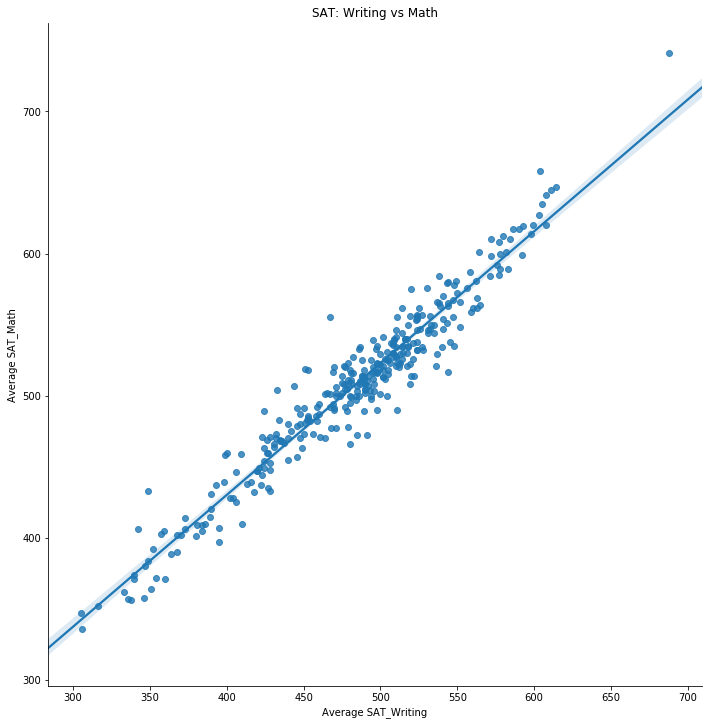

In [113]:
sns_plot = sns.lmplot(x='Average SAT_Writing', y='Average SAT_Math',data=MAS,size = 10)
plt.title('SAT: Writing vs Math')
plt.show()

In [114]:
X = add_constant(MAS[['Average SAT_Writing']])
Y = MAS['Average SAT_Math']
regrMW = smf.OLS(Y,X).fit()
regrMW.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Average SAT_Math   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     4838.
Date:                Sun, 18 Mar 2018   Prob (F-statistic):          3.25e-199
Time:                        05:28:53   Log-Likelihood:                -1377.4
No. Observations:                 332   AIC:                             2759.
Df Residuals:                     330   BIC:                             2766.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  59.2584      6.493      9.126      0.000      46.485      72.031
Average SAT_Writing     0.9273      0.013     69.556      0.000       0.901       0.954
==============================================================================
Omnibus:                       15.411   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.728
Skew:                           0.248   Prob(JB):                     5.78e-07
Kurtosis:                       4.353   Cond. No.                     3.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

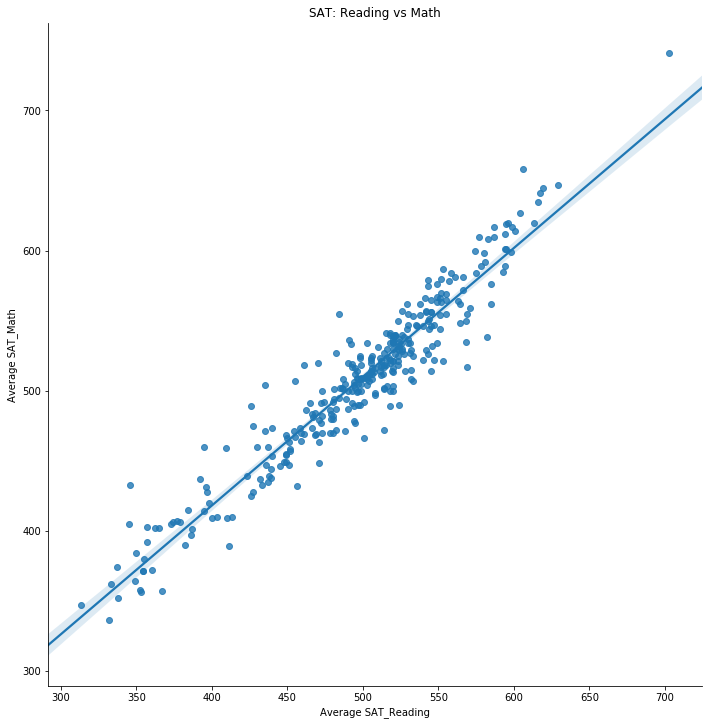

In [115]:
sns_plot = sns.lmplot(x='Average SAT_Reading', y='Average SAT_Math',data=MAS,size = 10)
plt.title('SAT: Reading vs Math')
plt.show()

In [116]:
X = add_constant(MAS[['Average SAT_Reading']])
Y = MAS['Average SAT_Math']
regrRM = smf.OLS(Y,X).fit()
regrRM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Average SAT_Math   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     3441.
Date:                Sun, 18 Mar 2018   Prob (F-statistic):          1.26e-176
Time:                        05:30:21   Log-Likelihood:                -1429.7
No. Observations:                 332   AIC:                             2863.
Df Residuals:                     330   BIC:                             2871.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  50.5062      7.846      6.438      0.000      35.073      65.940
Average SAT_Reading     0.9189      0.016     58.660      0.000       0.888       0.950
==============================================================================
Omnibus:                       11.628   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               19.092
Skew:                           0.208   Prob(JB):                     7.15e-05
Kurtosis:                       4.099   Cond. No.                     3.98e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Math SAT Scores as the Merit of Success

In [44]:
MAS = MASchools[MASchools['% Economically Disadvantaged'].notnull() &MASchools['Average SAT_Math'].notnull()]


In [45]:
knn = neighbors.KNeighborsRegressor(n_neighbors=20)

y = np.array(MAS['Average SAT_Math'])
X = np.array(MAS['% Economically Disadvantaged'])
X = X.reshape((X.shape[0],1))

knn.fit(X=X,y=y)
yhat = knn.predict(X = X)
MAS['SAT_Hat'] = yhat

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


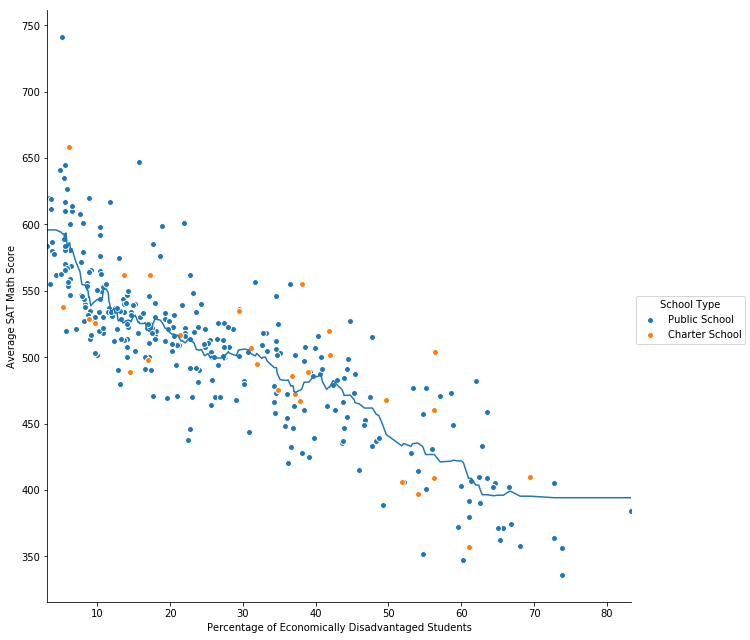

In [46]:
sns_plot = sns.pairplot(x_vars=['% Economically Disadvantaged'], y_vars=['Average SAT_Math'], data=MAS,hue='School Type', size=9)
fig = sns_plot.fig
MAS.sort_values('% Economically Disadvantaged').plot('% Economically Disadvantaged','SAT_Hat',ax=fig.axes[0],label='Prediction')
fig.axes[0].legend_.remove()
plt.xlabel('Percentage of Economically Disadvantaged Students')
plt.ylabel('Average SAT Math Score')
#plt.legend()
plt.show()

We use k nearest neighbors and see a clearly defined relationship. It shows that a linear relationship may be appropiate to fit to the data. 

In [133]:
X = add_constant(MAS[['% Economically Disadvantaged']])
Y = MAS['Average SAT_Math']
regrM = smf.OLS(Y,X).fit()
regrM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Average SAT_Math   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     756.2
Date:                Sun, 18 Mar 2018   Prob (F-statistic):           2.23e-87
Time:                        05:45:09   Log-Likelihood:                -1636.3
No. Observations:                 332   AIC:                             3277.
Df Residuals:                     330   BIC:                             3284.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          581.2811      3.267    177.936      0.000     574.855     587.707
% Economically Disadvantaged    -2.7798      0.101    -27.499      0.000      -2.979      -2.581
==============================================================================
Omnibus:                       47.967   Durbin-Watson:                   1.669
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.620
Skew:                           0.801   Prob(JB):                     3.46e-20
Kurtosis:                       4.978   Cond. No.                         57.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We see a clearly defined negative relationship here. For every percentage point increase in number of students that are economically disadvanatged we see 2.77 points drop off the Average SAT Math scores. The R^2 shows us that nearly 70 percent of the variability in SAT scores can be explained by the percentage of economically disadvantaged students. We also see that there is not apparent assumption violation in the residuals vs fit plot or the normality plot. 

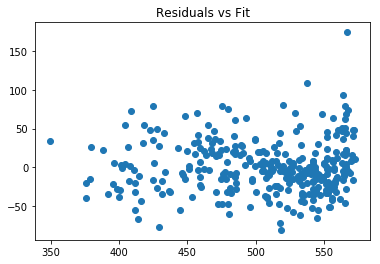

In [151]:
plt.scatter(regrM.predict(), regrM.resid)
plt.title('Residuals vs Fit')
plt.show()

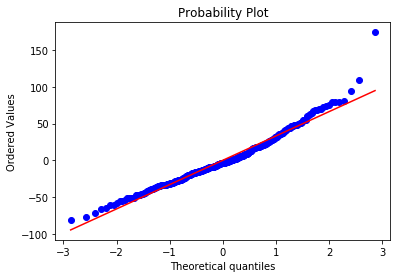

In [153]:
scipystats.probplot(regrM.resid, dist="norm", plot=pylab)
pylab.show()

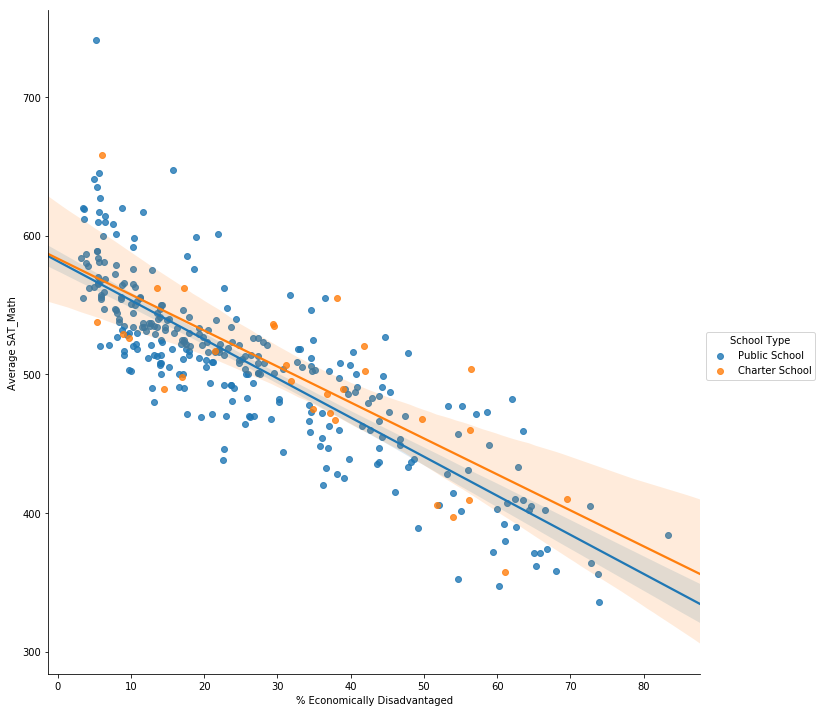

In [94]:
sns_plot = sns.lmplot(x='% Economically Disadvantaged', y='Average SAT_Math',data=MAS,hue='School Type',size = 10)
plt.show()

Here we have a linear model fit for broken up for the public school and charter schools. The confidence band is larger for the charter schools obviously since the sample size is much lower. However we see that both show very nearly the same model and since the public school and its confidence band is entirely contained by the confidence band for the charter school model we have no reason to believe they are different. 

## Passing the AP Exam as the Merit of Success

In [96]:
MAS2 = MASchools[MASchools['% Economically Disadvantaged'].notnull() &MASchools['% AP_Score 3-5'].notnull()]


In [117]:
knn = neighbors.KNeighborsRegressor(n_neighbors=20)

y = np.array(MAS2['% AP_Score 3-5'])
X = np.array(MAS2['% Economically Disadvantaged'])
X = X.reshape((X.shape[0],1))

knn.fit(X=X,y=y)
yhat = knn.predict(X = X)
MAS2['APpass_Hat'] = yhat

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


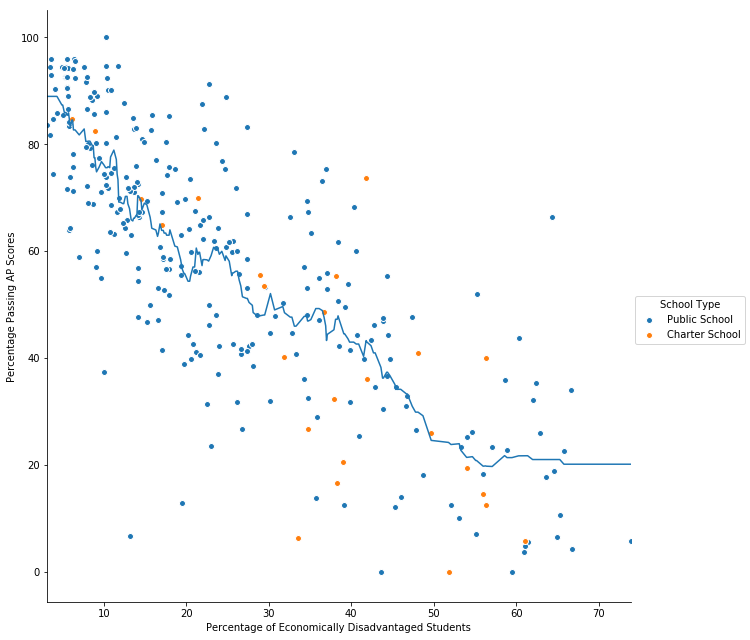

In [120]:
sns_plot = sns.pairplot(x_vars=['% Economically Disadvantaged'], y_vars=['% AP_Score 3-5'], data=MAS2,hue='School Type', size=9)
fig = sns_plot.fig
MAS2.sort_values('% Economically Disadvantaged').plot('% Economically Disadvantaged','APpass_Hat',ax=fig.axes[0],label='Prediction')
fig.axes[0].legend_.remove()
plt.xlabel('Percentage of Economically Disadvantaged Students')
plt.ylabel('Percentage Passing AP Scores')
#plt.legend()
plt.show()

We use k nearest neighbors and see a clearly defined relationship. It shows that a linear relationship may be appropiate to fit to the data. 

In [129]:
X = add_constant(MAS2[['% Economically Disadvantaged']])
Y = MAS2['% AP_Score 3-5']
regrAP = smf.OLS(Y,X).fit()
regrAP.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         % AP_Score 3-5   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     508.0
Date:                Sun, 18 Mar 2018   Prob (F-statistic):           1.37e-66
Time:                        05:44:46   Log-Likelihood:                -1249.2
No. Observations:                 303   AIC:                             2502.
Df Residuals:                     301   BIC:                             2510.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           86.4135      1.540     56.095      0.000      83.382      89.445
% Economically Disadvantaged    -1.1341      0.050    -22.540      0.000      -1.233      -1.035
==============================================================================
Omnibus:                       19.006   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.632
Skew:                          -0.406   Prob(JB):                     2.23e-07
Kurtosis:                       4.329   Cond. No.                         54.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We see a clearly defined negative relationship here. For every percentage point increase in number of students that are economically disadvanatged we see 1.13 points drop off the percentage passing the AP Exam. The R^2 shows us that nearly 63 percent of the variability in SAT scores can be explained by the percentage of economically disadvantaged students.  We also see that there is not apparent assumption violation in the residuals vs fit plot or the normality plot.

The SAT scores appear to have a stronger relationship with the economic disadvantage percentage than the AP exams do. Maybe this is because the population of students that are taking the AP Exams are encouraged with more confidence and/or provided more attention than the population of students taking the SAT scores? AP students would be a smaller population than SAT students. Actually the AP student population is most likely contained in its enterity within the SAT population. 

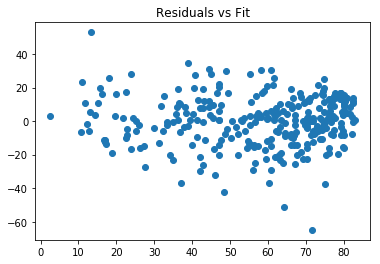

In [157]:
plt.scatter(regrAP.predict(), regrAP.resid)
plt.title('Residuals vs Fit')
plt.show()

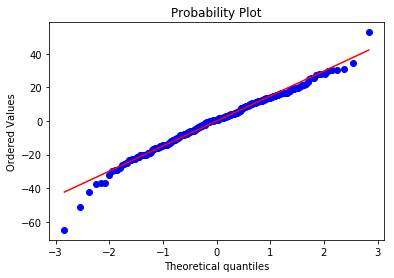

In [155]:
scipystats.probplot(regrAP.resid, dist="norm", plot=pylab)
pylab.show()

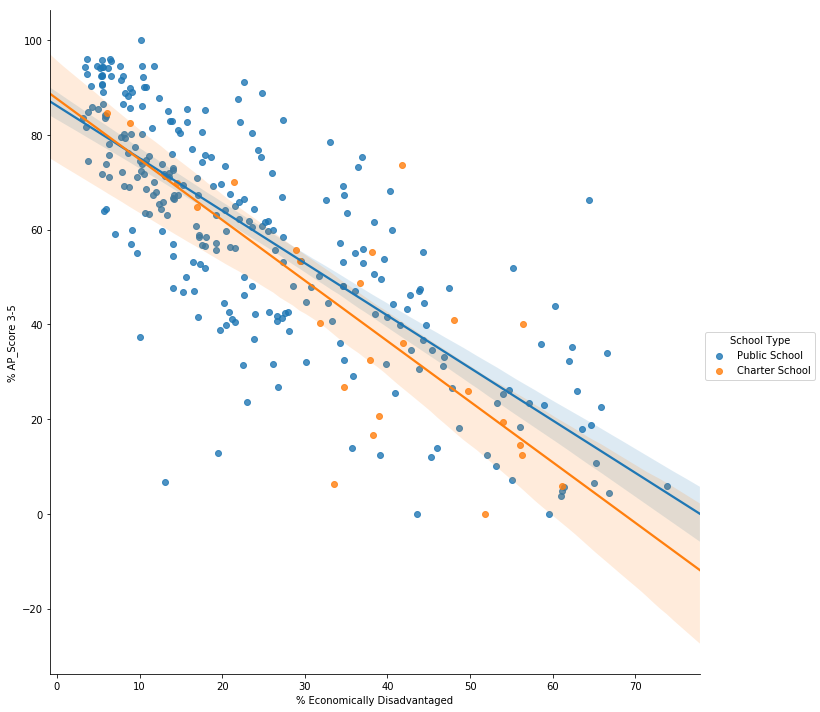

In [98]:
sns_plot = sns.lmplot(x='% Economically Disadvantaged', y='% AP_Score 3-5',data=MAS2,hue='School Type',size = 10)
plt.show()

The models for the public and charter schools appear to be approximately the same. Howeve, it does appear that the students that are attending the charter schools is decreasing at a slightly faster rate than the public schools. 

## College Attendance as the Merit of Success

In [100]:
MAS3 = MASchools[MASchools['% Economically Disadvantaged'].notnull() &MASchools['% Attending College'].notnull()]


In [122]:
knn = neighbors.KNeighborsRegressor(n_neighbors=20)

y = np.array(MAS3['% Attending College'])
X = np.array(MAS3['% Economically Disadvantaged'])
X = X.reshape((X.shape[0],1))

knn.fit(X=X,y=y)
yhat = knn.predict(X = X)
MAS3['College_Hat'] = yhat

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


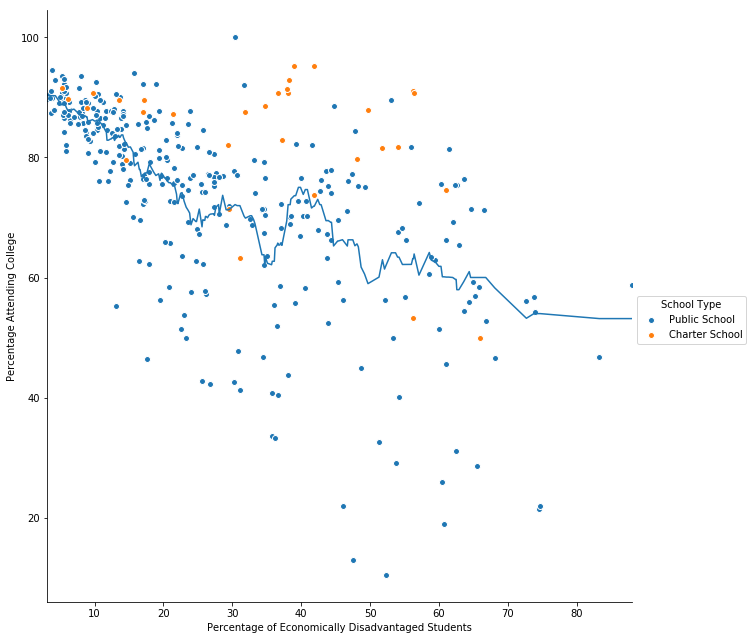

In [124]:
sns_plot = sns.pairplot(x_vars=['% Economically Disadvantaged'], y_vars=['% Attending College'], data=MAS3,hue='School Type', size=9)
fig = sns_plot.fig
MAS3.sort_values('% Economically Disadvantaged').plot('% Economically Disadvantaged','College_Hat',ax=fig.axes[0],label='Prediction')
fig.axes[0].legend_.remove()
plt.xlabel('Percentage of Economically Disadvantaged Students')
plt.ylabel('Percentage Attending College')
#plt.legend()
plt.show()

We use k nearest neighbors and see a clearly defined relationship. It shows that a linear relationship may be appropiate to fit to the data. We expect to see more variation than in the previous two models.

In [131]:
X = add_constant(MAS3[['% Economically Disadvantaged']])
Y = MAS3['% Attending College']
regrCol = smf.OLS(Y,X).fit()
regrCol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     % Attending College   R-squared:                       0.372
Model:                             OLS   Adj. R-squared:                  0.370
Method:                  Least Squares   F-statistic:                     202.8
Date:                 Sun, 18 Mar 2018   Prob (F-statistic):           1.88e-36
Time:                         05:44:55   Log-Likelihood:                -1365.2
No. Observations:                  344   AIC:                             2734.
Df Residuals:                      342   BIC:                             2742.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           89.0127      1.232     72.269      0.000      86.590      91.435
% Economically Disadvantaged    -0.5205      0.037    -14.240      0.000      -0.592      -0.449
==============================================================================
Omnibus:                       66.460   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.602
Skew:                          -1.020   Prob(JB):                     1.61e-29
Kurtosis:                       5.256   Cond. No.                         60.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This relationship appears to be less defined than the previous two merits of success. The R^2 suggests the model is only accounting for 37 percent of the variation. This is still significant just not quite as much. The model suggests for every percentage increase in economic disadvantage there is a .52 percentage decrease in students attending college. The residuals vs fits and the normality plots both show potential violations in assumptions. This was not totally unexpected based on the k nearest neighbors fit. 

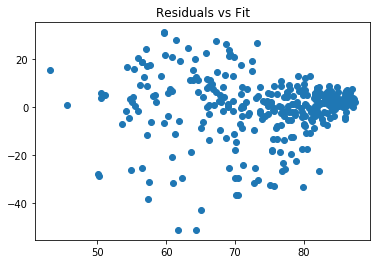

In [158]:
plt.scatter(regrCol.predict(), regrCol.resid)
plt.title('Residuals vs Fit')
plt.show()

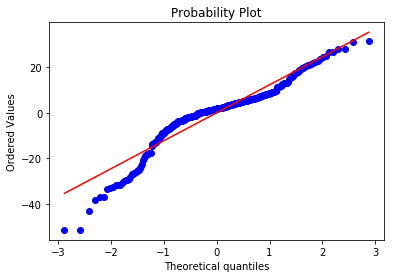

In [156]:
scipystats.probplot(regrCol.resid, dist="norm", plot=pylab)
pylab.show()

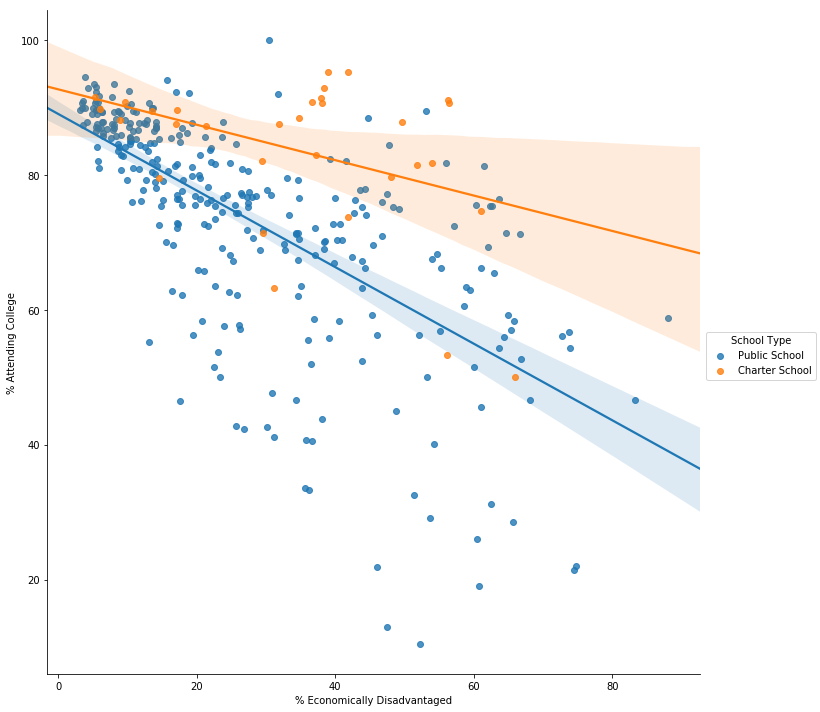

In [102]:
sns_plot = sns.lmplot(x='% Economically Disadvantaged', y='% Attending College',data=MAS3,hue='School Type',size = 10)
plt.show()

Here we see a clear difference in college attendance models for the public and charter schools. This is elaborated on in later sections. We also see a lot of deviation from the model suggesting that there may be a better model to fit the data, perhaps something quadratic. 

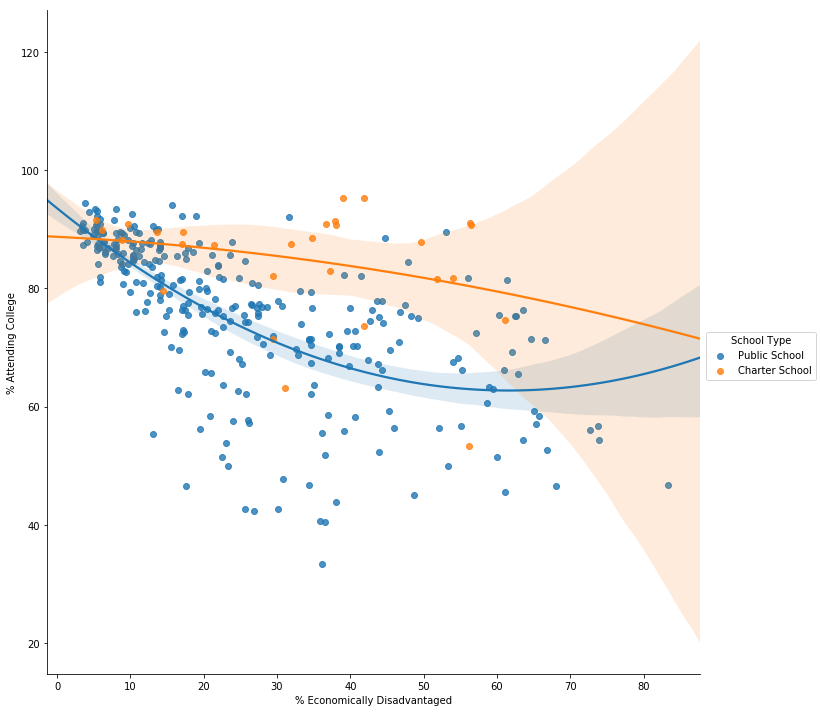

In [180]:
sns_plot = sns.lmplot(x='% Economically Disadvantaged', y='% Attending College', hue = 'School Type',data=MAS,size = 10, order = 2)
plt.show()

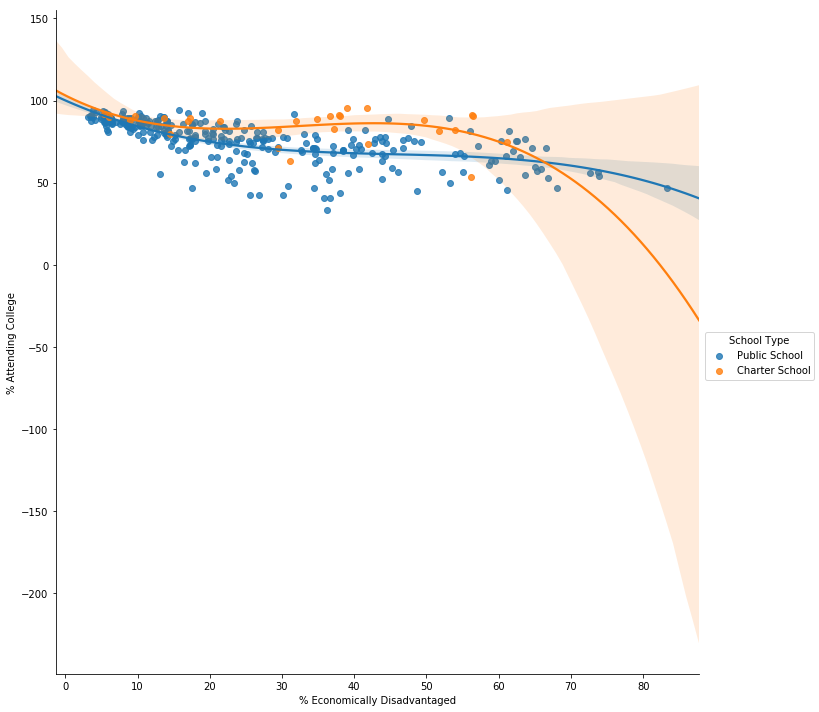

In [181]:
sns_plot = sns.lmplot(x='% Economically Disadvantaged', y='% Attending College', hue = 'School Type',data=MAS,size = 10, order = 3)
plt.show()

What are we looking at here? There is a clear effect of this difference between charter school and public schools. This is worth more investigation as to what exactly is happening here. 

## Other interesting topics to analyze

### Do charter school perform better on average than public schools?

Because charter schools are able to operate independently of the established state school system in which it is located, some believe these schools can meet the needs of parents and students in more creative or perhaps even more effective ways, thereby better preparing their students for college. 

(See article: 
<a href="https://www.excelined.org/edfly-blog/many-reasons-parents-students-choose-public-charter-schools/">For Many Reasons, Parents and Students Choose Public Charter Schools</a>)

To study the effectives of charter schools for college preparation, the variables of interest for comparison between the school types are:
1. AP Scores
2. % of students taking AP exams 
3. Average SAT Scores
4. % Attending College

Since AP courses are college-level curricula and SAT score is one of the major deciding factors during the college admissions selection, higher scores on the these standardized tests as well as greater number of AP tests subjects taken are great indicators of how proactive and effective the schools are at prepping their students college. As such, we would also expect schools with higher performance to have a higher percentage of students successfully attending college.

An analysis on the distribution of test scores between public and charter school shows, however, that charter schools are performing worse on average than public schools. At first glance,  AP test takers from public schools take more exams than those from charter schools on average, suggesting that public schools might be challenging their students more so in college prep than charter schools.

In [54]:
# Focus on ratio of AP Test taken vs AP Test Takers
df = MASchools.loc[:,["AP_Test Takers", "AP_Tests Taken", "School Type"]].dropna()
testtaken = df["AP_Tests Taken"].values.tolist()
testtakers = df["AP_Test Takers"].values.tolist()
df["AP_Tests Taken"] = [float(x.replace(",","")) for x in testtaken]
df["AP_Test Takers"] = [float(x.replace(",","")) for x in testtakers]
df['ratio'] = df["AP_Tests Taken"]/df["AP_Test Takers"]

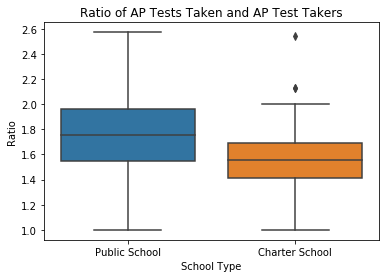

In [55]:
ax3 = sns.boxplot(x="School Type", y = 'ratio', data = df)
ax3.set(title = "Ratio of AP Tests Taken and AP Test Takers", xlabel = 'School Type',
       ylabel = "Ratio")
ax3.set_xticklabels(ax3.get_xticklabels())
plt.show()

In [56]:
dfcharter = MASchools[MASchools['School Type']=='Charter School']
dfpublic = MASchools[MASchools['School Type']=='Public School']
meancharter = dfcharter["% AP_Score 3-5"].mean()
meanpublic = dfpublic["% AP_Score 3-5"].mean()

And from the comparison of AP scores below, they might be better at equipping them as well. From the plot above, public schools show a much higher success rate of students scoring 3 and above (3 being a pass and 5 being a distinction) at approximately 60%, while charter schools have a pass rate of only 40%.

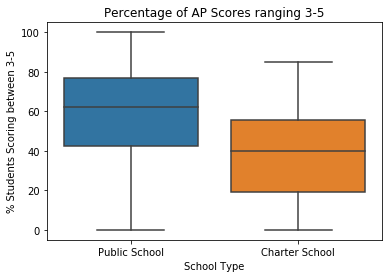

In [57]:
ax2 = sns.boxplot(x = "School Type", y = "% AP_Score 3-5", data = MASchools)
ax2.set(title = "Percentage of AP Scores ranging 3-5", xlabel = 'School Type',
       ylabel = "% Students Scoring between 3-5")
ax2.set_xticklabels(ax2.get_xticklabels())
plt.show()

A quick comparison of the average SAT scores across all categories also show a higher score among public schools, though public schools have more variations in the scores than do charter schools in MA.

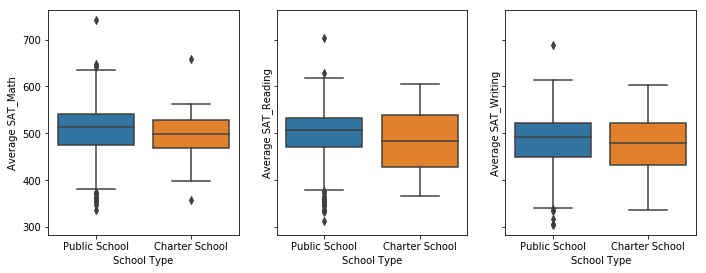

In [58]:
# Side-by-side comparisons of Average SAT Scores 
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey = True)
sns.boxplot(x="School Type", y="Average SAT_Math", data = MASchools, ax=ax1)
sns.boxplot(x="School Type", y="Average SAT_Reading", data = MASchools, ax=ax2)
sns.boxplot(x="School Type", y="Average SAT_Writing", data = MASchools, ax=ax3)
fig.subplots_adjust(left=0.5, bottom=0.1, right=2, top=None,
                wspace=None, hspace=0.2)
plt.show()

However, to conclude that public schools are a better choice for success in college is not so clear cut. From the plot below, a higher percentage of students from charter schools appear to have attended college in comparison to public schools despite the lower standardized test scores.

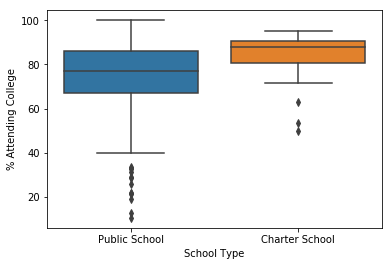

In [59]:
sns.boxplot(x = 'School Type', y = "% Attending College", data = MASchools)
plt.show()

Author of the article, Sam Duell, and other parents might be on to something. What could be the case here? As it turns out, charter schools in MA have a higher percentage of high needs students/economically disadvantaged students than do public schools.

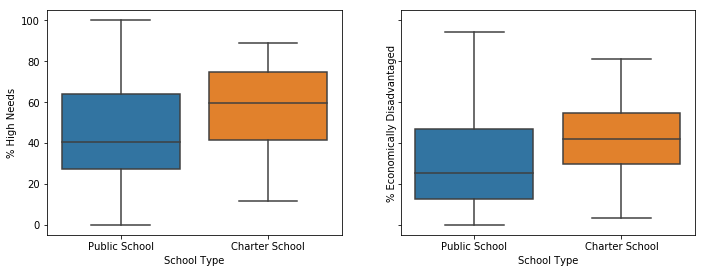

In [60]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey = True)
sns.boxplot(x = "School Type", y = "% High Needs", data = MASchools, ax=ax1)
sns.boxplot(x = "School Type", y = "% Economically Disadvantaged", data = MASchools, ax=ax2)
fig.subplots_adjust(left=0.5, bottom=0.1, right=2, top=None,
                wspace=None, hspace=0.2)
plt.show()

Given this information, the results of our current analysis showing lower performance in charter schools makes sense, as it is consistent with our findings from our main analysis--that students from lower income families perform poorer than their peers in higher income brackets. It also implies that students of color are more heavily concentrated in charter schools. The following plots affirm this to be true:

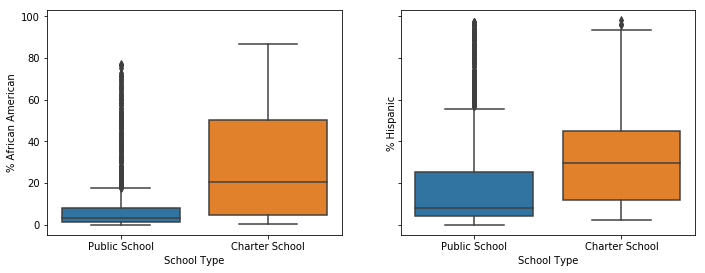

In [61]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey = True)
sns.boxplot(x = "School Type", y = "% African American", data = MASchools, ax=ax1)
sns.boxplot(x = "School Type", y = "% Hispanic", data = MASchools, ax=ax2)
fig.subplots_adjust(left=0.5, bottom=0.1, right=2, top=None,
                wspace=None, hspace=0.2)
plt.show()

As such, other confounding factors could be involved that lead to the higher college acceptance rate of students from charter schools. For example, affirmative action in college admissions may be at work to improve the educational opportunities of the minority ethnic student groups from charter schools. Should that be case, the argument for charter schools being better at college prep would not hold, and would require more research and empirical evidence to support the case for charter schools.

## Conclusions

After all of this we come to one over arching conclusion: the percentage of students at a school who are economically disadvantaged can account for the majority of variation in numerous measures of academic success. In other words, Massachusetts Department of Education has some work to do. We could question where this comes from? Is it from home or is it from school? Are the students themselves not interested? We think this is a common theme in the United States though. People from lower income areas struggle more with getting good oppurtunities and the assistance they need for success. We could continue to analyze data sets hoping for a eureka moment where we pinpoint the exact reason this is happening, or we can go to schools where students are largely economically disadvantaged and just ask 'What do you need? What isn't working here?'. This data set can tell us that there is a problem. The next step is to speak to the people making up the data points we have seen in this analysis and work with them to help build a better education system that suits all students regardless of their background. 

## Future Research

We touch a little more in depth on future reaseach ideas in our Supplementary Analysis notebook added in this repository. We think that a good next step is to look at trends in other states. Each state has its own education system and it would be informative to see how each state is working. If some states are doing better with this issue than others, why is that? The next question is how are we doing comapred with the rest of the world? That is a particularly difficult problem to handle because the education systems between countries are vastly more different than when just comparing between states. Specific ideas and potential starting point data sets for future work along with preliminary findings can be found in the Supplementary Analysis notebook. 

## One Last Thing

This is a little off the topic of our analysis. However, we found the way Massachussets ranks schools accountability report card interesting. It is a way of measuring a schools progress towards narrowing proficiency gaps, (7). The take away is that the schools with higher percentages of lower income students are scoring very low on the accountability profile. This is good because it is indicating that these schools where we are seeing lower scoring students are being flagged as schools in need of additional assistance. None of the schools are at the lowest ranking of level 5. We do see that Level 3 and Level 4 are the lowest rankings after that and we do see that the average SAT score is decreasing as the rankings get lower. Again this is good because ideally this system is flagging the schools where students need more help. 

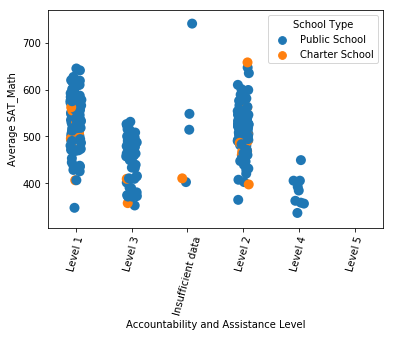

In [148]:
sns.stripplot(x="Accountability and Assistance Level", y="Average SAT_Math", hue="School Type", data=MASchools, jitter=True, size = 10 )
plt.xticks(rotation=75)
plt.show()

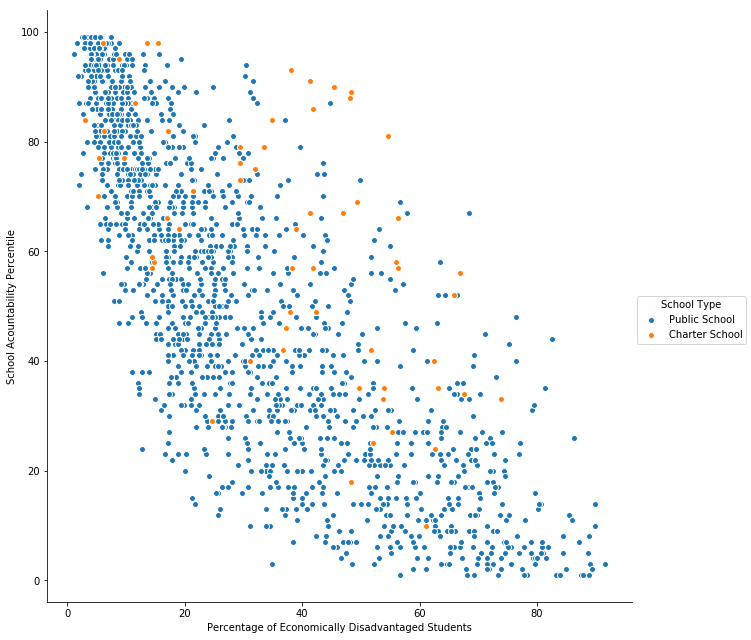

In [51]:
sns.pairplot(x_vars=['% Economically Disadvantaged'], y_vars=['School Accountability Percentile (1-99)'], data=MASchools, hue='School Type', size=9)
plt.xlabel('Percentage of Economically Disadvantaged Students')
plt.ylabel('School Acountability Percentile')
plt.show()

## Sources

1. Lynch, Matthew. “18 Reasons the U.S. Education System is Failing.” The Edvocate, 3 Apr. 2017, www.theedadvocate.org/10-reasons-the-u-s-education-system-is-failing/.
2. Massachusetts Department of Elementary and Secondary Education. “Mass. students are #1 in the nation and at the top internationally.” Massachusetts Department of Elementary and Secondary Education, www.doe.mass.edu/.
3. “QuickFacts.” U.S. Census Bureau QuickFacts: Massachusetts, www.census.gov/quickfacts/fact/table/MA/PST045217.
4. “QuickFacts.” U.S. Census Bureau QuickFacts: UNITED STATES, www.census.gov/quickfacts/fact/table/US/PST045216.
5. Dalziel, Nigel. Massachusetts Public Schools Data | Kaggle, 22 Aug. 2017, www.kaggle.com/ndalziel/massachusetts-public-schools-data.
6. NCCP. “Demographics.” NCCP | Massachusetts: Demographics of Poor Children, www.nccp.org/profiles/MA_profile_7.html.
7. “Profiles Help - About the Data.” School and District Profiles, profiles.doe.mass.edu/help/data.aspx?section=acct.